In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def coth(a):
    if a>0: return (1+tf.math.exp(-2*a))/(1-tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)+1)/(tf.math.exp(2*a)-1)
    if a==0: return 0

def tanh(a):
    if a>0: return (1-tf.math.exp(-2*a))/(1+tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)-1)/(tf.math.exp(2*a)+1)
    if a==0: return 0

In [3]:
data=10000
batch=100
set=100
layer=10
n_ini=1.0
n_fin=0.1
dn=-0.1
c_reg1=0.015
c_reg2=0.0001
d=3

m^2= <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.460962663121915>
lam= <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.7965945217551447>
alpha= <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=-0.29218102214007546>
beta= <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=0.4841916857291889>
<tf.Variable 'Variable:0' shape=(10,) dtype=float64, numpy=
array([2.63087062, 1.47912398, 1.34328319, 0.81260973, 0.9409968 ,
       1.48487972, 3.51316727, 2.67773974, 2.62937702, 0.18111521])>


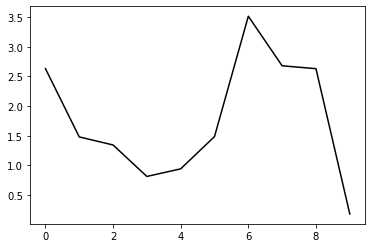

In [4]:
h=tf.zeros(layer)
h_in=[]
for i in range (layer):
    h_inn=np.float64(np.random.normal(2, 1))
    h_in.append(h_inn)
h=tf.Variable(h_in)
m2=tf.Variable(np.float64(np.random.normal(2, 1)))
lam=tf.Variable(np.float64(np.random.normal(1, 1)))
alpha=tf.Variable(np.float64(np.random.uniform(-0.5, 0.5)))
beta=tf.Variable(np.float64(np.random.uniform(-0.5, 0.5)))
#m2=tf.constant(np.float64(5.6))
#lam=tf.constant(np.float64(0.61))
#alpha=tf.constant(np.float64(1.444635))
#beta=tf.constant(np.float64(0.00615))
print("m^2=", m2)
print("lam=", lam)
print("alpha=", alpha)
print("beta=", beta)
print(h)
plt.plot(h.numpy(), 'k-')
plt.show()

In [5]:
def F_func(m, la, a,b):
    return 2*b/n_fin-m*a-la*(a**3)

def t_func(a):
    return 0.5*(tf.math.tanh(100*(a-0.1))-tf.math.tanh(100*(a+0.1))+2)

In [6]:
x=[i*0.2 for i in range (30)]
y=[0.0, 0.018, 0.035, 0.053, 0.0715, 0.0895, 0.107, 0.125, 0.146, 0.1665, 0.1875, 0.2085, 0.229, 0.25, 0.265, 0.281, 0.296, 0.3115, 0.3275, 0.343, 0.3565, 0.385, 0.4375, 0.5, 0.6, 0.675, 0.735, 0.815, 0.865, 0.885]
y[:]=[2*v for v in y]
fp1 = np.polyfit(x, y, 15)
print(fp1)

[ 1.59046394e-05 -6.81729682e-04  1.31412795e-02 -1.50525136e-01
  1.14052774e+00 -6.02241647e+00  2.27455168e+01 -6.20704699e+01
  1.22166922e+02 -1.71187074e+02  1.66428955e+02 -1.07461552e+02
  4.28229887e+01 -9.20544914e+00  9.55260239e-01 -1.30911492e-04]


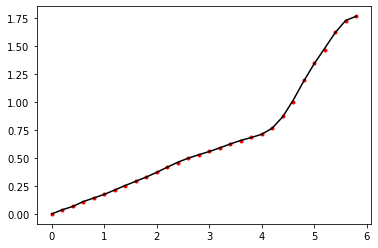

In [7]:
def f(x):
    y=0
    for i in range (16):
        y=y+fp1[i]*x**(15-i)
    return y
yy=[f(i*0.2) for i in range (30)]
plt.plot(x, y, 'r.')
plt.plot(x, yy, 'k-')
plt.show()

In [8]:
def NN_func_p(f):
    Positive=[]
    append=Positive.append
    while len(Positive)<batch:
        H=np.random.uniform(0.0, 6.0)
        M=np.random.uniform(0.0, 2.0)
        noise=np.abs(np.random.normal(0, 0.1))
        if np.abs(M-f(H))<=noise: append([H, M])
        else: continue
    return Positive
def NN_func_n(f):
    Negative=[]
    append=Negative.append
    while len(Negative)<batch:
        H=np.random.uniform(0.0, 6.0)
        M=np.random.uniform(0.0, 2.0)
        noise=np.abs(np.random.normal(0, 0.1))
        if np.abs(M-f(H))>noise: append([H, M])
        else: continue
    return Negative

In [9]:
Positive=[]
Negative=[]
for i in range (set):
    Positive.insert(i, NN_func_p(f))
    Negative.insert(i, NN_func_n(f))

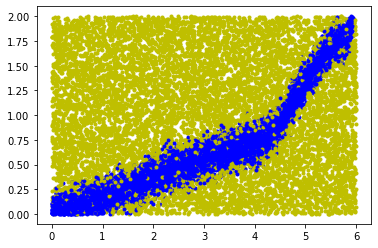

In [10]:
x_data1=[]
y_data1=[]
x_data2=[]
y_data2=[]
for i in range (set):
    x_data1.insert(i, [v[0] for v in Positive[i]])
    y_data1.insert(i, [v[1] for v in Positive[i]])
    x_data2.insert(i, [v[0] for v in Negative[i]])
    y_data2.insert(i, [v[1] for v in Negative[i]])
    plt.plot(x_data2[i], y_data2[i], 'y.')
    plt.plot(x_data1[i], y_data1[i], 'b.')
plt.show()

In [11]:
def Dfunc(hh, m):
    D=tf.math.sqrt(tf.math.abs(1+4*m/(hh[0]**2)))
    return D

In [12]:
def LP2(hh, m, la, alpha, beta, HH, MM):
    D=Dfunc(hh, m)
    phi=alpha*HH+beta*MM
    pi=(d/2)*(D-1)*alpha*HH+(d/2)*(-D-1)*beta*MM
    for j in range (layer-1):
        phi1=phi+dn*pi
        pi1 =phi*m*dn+(1-dn*hh[j])*pi+dn*la*(phi1**3)
        phi=phi1
        pi=pi1
    return phi, pi
def NN_func_01(hh, m, la, alpha, beta, list_hr):
    PP=[]
    NN=[]
    H=np.array(list_hr)[:, 0]
    M=np.array(list_hr)[:, 1]
    F=np.array(tf.math.abs(LP2(hh, m, la, alpha, beta, H, M)[1]))
    for i in range (len(H[F<0.1])):
        PP.append([H[F<0.1][i], M[F<0.1][i]])
    for i in range (len(H[F>=0.1])):
        NN.append([H[F>=0.1][i], M[F>=0.1][i]])
    return PP, NN

In [13]:
Positive0=[]
Positive1=[]
Negative0=[]
Negative1=[]
for i in range (set):
    Positive0.insert(i, NN_func_01(h, m2, lam, alpha, beta, Positive[i])[0])
    Positive1.insert(i, NN_func_01(h, m2, lam, alpha, beta, Positive[i])[1])
    Negative0.insert(i, NN_func_01(h, m2, lam, alpha, beta, Negative[i])[0])
    Negative1.insert(i, NN_func_01(h, m2, lam, alpha, beta, Negative[i])[1])

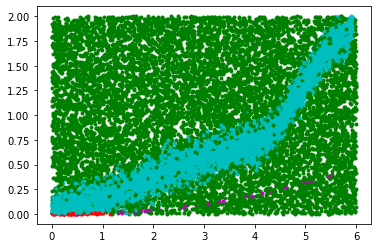

In [14]:
x_data1=[]
y_data1=[]
x_data2=[]
y_data2=[]
x_data3=[]
y_data3=[]
x_data4=[]
y_data4=[]
for i in range (set):
    x_data1.insert(i, [v[0] for v in Positive0[i]])
    y_data1.insert(i, [v[1] for v in Positive0[i]])
    x_data2.insert(i, [v[0] for v in Positive1[i]])
    y_data2.insert(i, [v[1] for v in Positive1[i]])
    x_data3.insert(i, [v[0] for v in Negative0[i]])
    y_data3.insert(i, [v[1] for v in Negative0[i]])
    x_data4.insert(i, [v[0] for v in Negative1[i]])
    y_data4.insert(i, [v[1] for v in Negative1[i]])
    plt.plot(x_data4[i], y_data4[i], 'g.')
    plt.plot(x_data2[i], y_data2[i], 'c.')
    plt.plot(x_data1[i], y_data1[i], 'r.')
    plt.plot(x_data3[i], y_data3[i], 'm.')
plt.show()

# Error function

$E=\sum_{data} \left\vert y(\bar{x}^{(1)}) - \bar{y} \right\vert+E_{reg}(W)$
, $E_{reg}=c_{reg}^{(1)}\sum_{n=1}^{N-1}(\eta^{(n)})^{4}(h(\eta^{(n+1)})-h(\eta^{(n)}))^{2}+c_{reg}^{(2)}(h(\eta^{(N)})-1/\eta^{(N)})^{2}$

In [15]:
def Error_func(hh, m, la, alpha, beta, list1, list2):
    H0=np.array([v[0] for v in list1])
    M0=np.array([v[1] for v in list1])
    H1=np.array([v[0] for v in list2])
    M1=np.array([v[1] for v in list2])
    H_0, M_0=LP2(hh, m, la, alpha, beta, H0, M0)
    H_1, M_1=LP2(hh, m, la, alpha, beta, H1, M1)
    PPlist=t_func(M_0)
    NNlist=t_func(M_1)
    sum_p=sum(PPlist)/batch
    sum_n=(batch-sum(NNlist))/batch

    inside=0
    for k in range (layer-1):
        second=((n_ini+k*dn)**4)*((hh[k+1]-hh[k])**2)
        inside=inside+second
    E_reg1=c_reg1*inside
    E_reg2=c_reg2*((hh[layer-1]-1/n_fin)**2)
    return sum_n+sum_p+E_reg1+E_reg2

In [16]:
for i in range (set):
    print(Error_func(h, m2, lam, alpha, beta, Positive[i], Negative[i]))

tf.Tensor(1.0463540426520705, shape=(), dtype=float64)
tf.Tensor(1.0179830454788912, shape=(), dtype=float64)
tf.Tensor(1.0363540879628619, shape=(), dtype=float64)
tf.Tensor(1.0315807452885082, shape=(), dtype=float64)
tf.Tensor(1.0263540893747498, shape=(), dtype=float64)
tf.Tensor(1.0457588242186364, shape=(), dtype=float64)
tf.Tensor(1.0364559696541846, shape=(), dtype=float64)
tf.Tensor(1.0363540890629894, shape=(), dtype=float64)
tf.Tensor(1.0263540891534932, shape=(), dtype=float64)
tf.Tensor(1.0381532868504355, shape=(), dtype=float64)
tf.Tensor(1.0463540873654094, shape=(), dtype=float64)
tf.Tensor(1.0375547870391153, shape=(), dtype=float64)
tf.Tensor(1.0263620847695358, shape=(), dtype=float64)
tf.Tensor(1.036355715565363, shape=(), dtype=float64)
tf.Tensor(1.0263541657906796, shape=(), dtype=float64)
tf.Tensor(1.036487693238228, shape=(), dtype=float64)
tf.Tensor(1.0263540902728925, shape=(), dtype=float64)
tf.Tensor(1.0458627171204913, shape=(), dtype=float64)
tf.Tensor(1.

# Optimize

0 1.0422859170296395
1.4589259107539334 1.7992159993325922 -0.2997004530661365 0.47864377019422993
[2.58087148 1.52912305 1.29329089 0.86260575 0.99097189 1.53486217
 3.46317394 2.72769273 2.57965503 0.23110097]


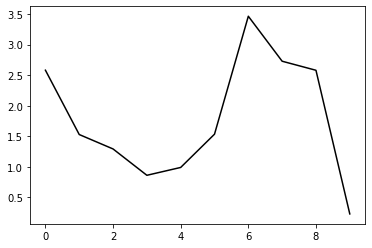

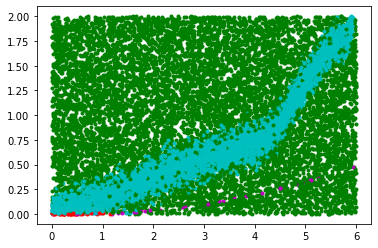

1000 0.9932099171186546
1.6002789124418209 1.6596775837420956 -0.16149865914130127 0.5885791427383313
[1.98209764 1.98527935 1.99059834 1.99966372 2.01568663 2.04541909
 2.10541859 2.24371251 2.65884641 4.89228573]


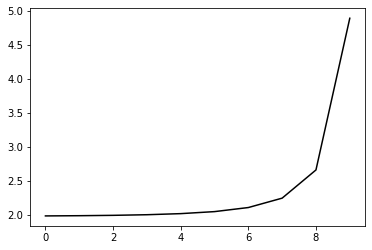

2000 1.0063744699066364
1.6027715273559822 1.652592793875832 -0.15169084236732824 0.5871890539790598
[2.19479769 2.20173532 2.20065175 2.17728954 2.11366267 1.99603344
 1.84855321 1.81363124 2.4680848  8.44155312]


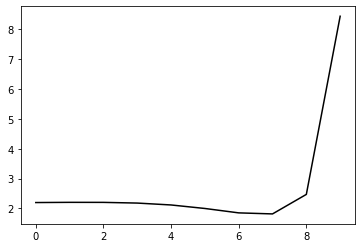

3000 1.0023343888256975
1.5992803536378766 1.6440799428782007 -0.13602307585114118 0.5802736116977888
[2.43615446 2.2194403  2.04874016 1.96402273 1.85714924 1.72813759
 1.60611043 1.5980312  2.20562201 8.45825885]


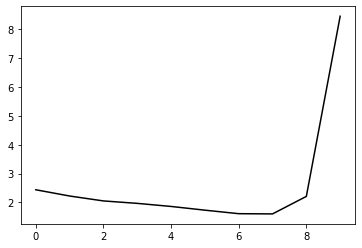

4000 0.9919919318675549
1.5759508062644874 1.6734700445721775 -0.17180675801099052 0.5730032004497544
[2.6612744  2.65578615 2.44757625 2.21284379 2.02106023 1.89857622
 1.87675906 2.07624942 3.09895171 8.68413215]


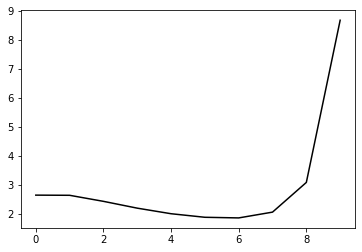

5000 1.0026220628428255
1.6028992026947513 1.6407880618382291 -0.1381280902886366 0.5884669705326975
[2.45021213 2.76136492 2.79173218 2.71535375 2.60958281 2.47863195
 2.3218107  2.24728503 2.91180784 8.62813984]


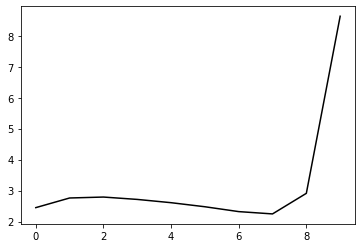

6000 1.0014268338300647
1.6165729512738383 1.6152735666039721 -0.1065164961739845 0.5840228700645792
[2.4960465  2.39452914 2.28782095 2.23315005 2.16725626 2.09695236
 2.0360126  2.02671656 2.52219551 8.52116238]


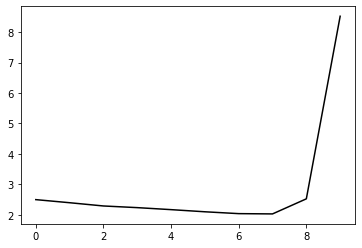

7000 1.0012370854475292
1.6068201858771716 1.6104694904992833 -0.09702680128256166 0.5710909466627336
[2.51482261 2.4935442  2.39856796 2.35414026 2.29174911 2.20676797
 2.10588262 2.06973567 2.61776964 8.56168462]


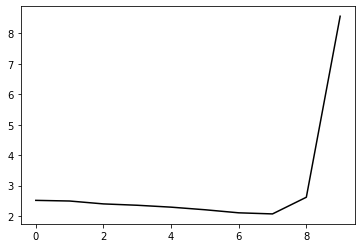

8000 1.0011168017987833
1.585500384692911 1.60530006955825 -0.08280788831391987 0.5459421781225843
[2.52461465 2.5159446  2.50489922 2.49157529 2.46385261 2.40706696
 2.29863339 2.16912449 2.57594087 8.55828873]


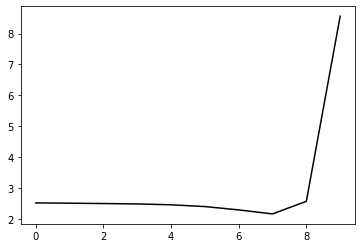

9000 1.0011453061235303
1.5686033290816639 1.5879438885401167 -0.053964493108911736 0.4939098158501988
[2.44803844 2.45407374 2.45485415 2.43807055 2.38598328 2.28286147
 2.14039131 2.06161294 2.57711483 8.56479874]


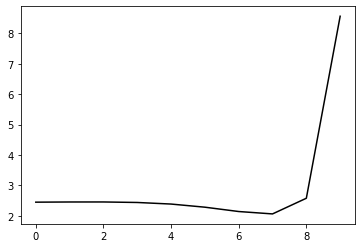

10000 1.0011144354864692
1.5455178855927623 1.5798980377137624 -0.04678616392738264 0.4191646615744008
[2.37655385 2.34967596 2.31535774 2.27490124 2.2284934  2.17080322
 2.11616871 2.13747834 2.73635166 8.58800426]


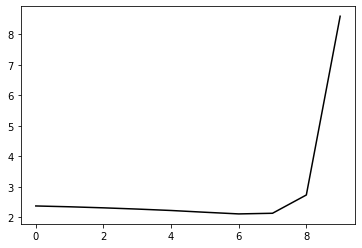

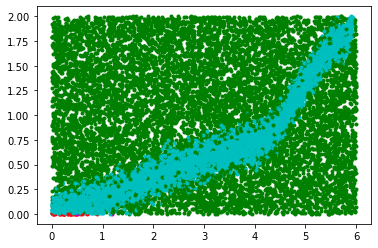

11000 1.0014357962612634
1.4652513386368893 1.5796686327287828 -0.03681493979954438 0.24994948274138748
[2.31422134 2.24213554 2.1637507  2.0648509  1.96437645 1.88276509
 1.80035029 1.76033881 2.31190142 8.52829328]


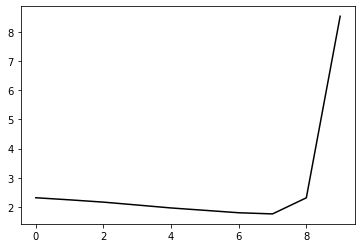

12000 1.0095586575190942
1.1880312937169146 1.525729873587007 -0.02857949282649571 0.04666319972356948
[ 2.18180439  1.89576807  1.48029339  1.09859987  0.72489202  0.35177016
  0.02378162 -0.15669051  0.3227569   8.10522476]


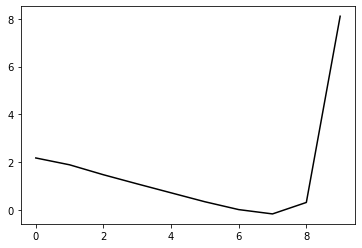

13000 0.3973577648391387
1.126753704226711 1.1718028476355578 0.07216709980703012 0.044870473295948496
[ 1.47429249  1.69028777  1.62718699  1.28713651  0.784725    0.20348229
 -0.36299161 -0.74778271 -0.38997607  7.98638562]


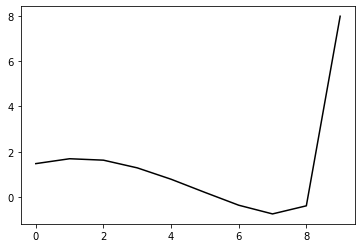

14000 0.417819636897999
1.1344618255163643 0.9638086975401489 0.07274600036842321 0.04951687011374243
[ 1.35380648  1.50026295  1.46840998  1.30181239  0.93972678  0.36580444
 -0.32402519 -0.89207903 -0.68776497  7.94576123]


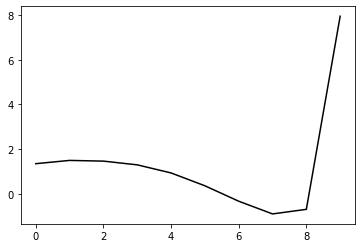

15000 0.4692179409139613
1.1341249887385032 0.754120312243443 0.06425296294761564 0.047148664474144106
[ 1.28343165  1.36246616  1.32040787  1.16840769  0.85874612  0.32890122
 -0.42480979 -1.17437453 -1.13138947  7.81581907]


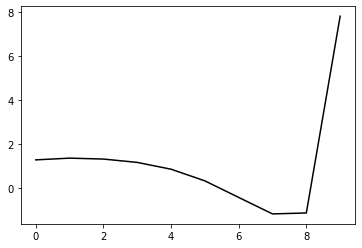

16000 0.4350470793551284
1.1281553378271083 0.6258567762423191 0.06543399861680414 0.05995869125197541
[ 1.26059014  1.24985893  1.20996147  1.07742577  0.79750873  0.30247277
 -0.46287235 -1.34133916 -1.44118986  7.79029484]


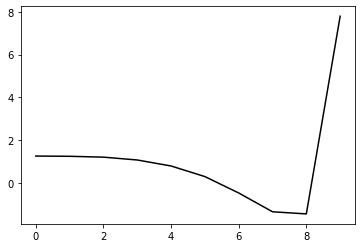

17000 0.459251752331849
1.1220708338653391 0.4544546727984598 0.06036104187760774 0.06388763339812904
[ 1.25089205  1.15965997  1.0965527   0.9590785   0.68437301  0.19950411
 -0.58146931 -1.57559881 -1.81981975  7.715865  ]


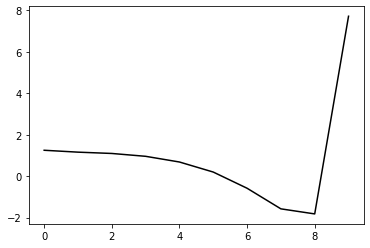

18000 0.38830578375847624
1.1151459684115623 0.33569688933817815 0.06424951207712357 0.06472955537960183
[ 1.20302178  1.13255808  1.03487997  0.89167842  0.63131533  0.16568441
 -0.60968903 -1.67733288 -2.05595803  7.64935726]


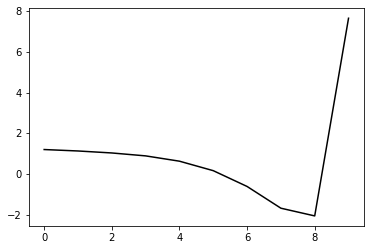

19000 0.4070984195137951
1.1044372902211301 0.18388994891650037 0.06616691978615598 0.06637054144110624
[ 1.14639867  1.08975029  0.98901085  0.82628507  0.54506245  0.07196199
 -0.70847272 -1.83167301 -2.33513612  7.5653409 ]


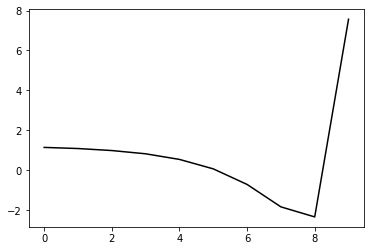

20000 0.390033735209779
1.1008417750713517 -0.03348845412369697 0.07320176659056882 0.06743872956423887
[ 1.06161714  1.12836522  1.03217036  0.86328973  0.57578285  0.09888429
 -0.68181041 -1.83770714 -2.44856476  7.59714225]


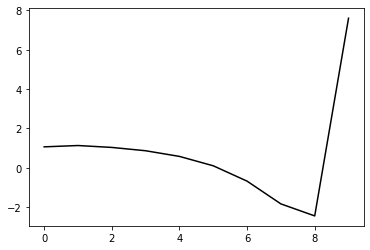

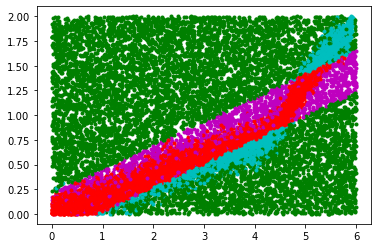

21000 0.29868437790398433
1.0850366443630453 -0.18652156471475392 0.07557786406900811 0.07950500543767695
[ 1.08888302  1.10665876  1.02594346  0.85939261  0.57912388  0.10942332
 -0.67057264 -1.8531273  -2.56784941  7.56157158]


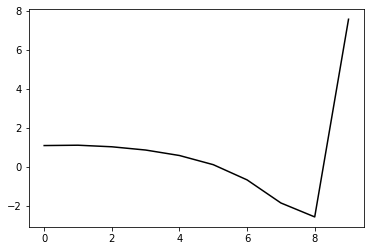

22000 0.4173955834124483
1.0502215228047822 -0.40791694702293 0.08653511753304692 0.07875880220129643
[ 1.15643476  0.98190844  0.86177981  0.67349521  0.3689479  -0.12711203
 -0.94366093 -2.19616129 -3.06512059  7.45152549]


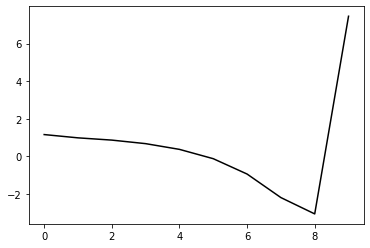

23000 0.2256434033336743
0.920291057716728 -0.8580709882519231 0.13995510469348282 0.10683411249054003
[ 1.33320262  1.17177424  0.98997462  0.80122754  0.54855053  0.13323465
 -0.60174842 -1.80119054 -2.68928721  7.52889042]


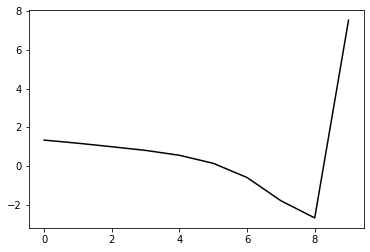

24000 0.15759796421674283
0.9024881912321501 -0.8436625730558381 0.14494510582368228 0.0958014132042764
[ 1.39892633  1.30111023  1.14813899  0.96396695  0.71940644  0.34747787
 -0.30466089 -1.44445174 -2.42018339  7.60446596]


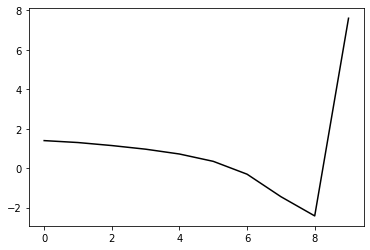

25000 0.2333239533098388
0.871458901264484 -0.8243479189694861 0.14079350993465548 0.09296706532748374
[ 1.50053741  1.31116272  1.16263382  0.97356936  0.71978528  0.34582333
 -0.28341095 -1.38819137 -2.43695185  7.57070466]


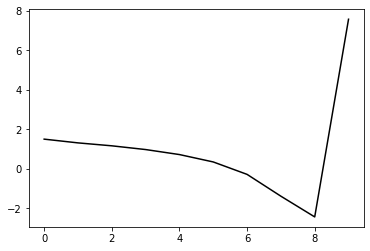

26000 0.1689527737966994
0.8464279047261133 -0.8145597857348578 0.14089253381144548 0.09168983882956451
[ 1.52153608  1.38051211  1.25930114  1.09370028  0.85259273  0.4849529
 -0.12843072 -1.20221163 -2.3024191   7.6317435 ]


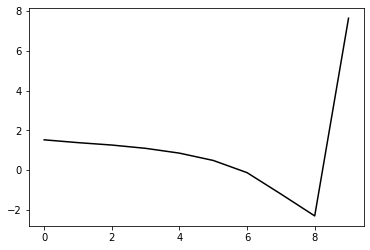

27000 0.21843725081901835
0.8316575358017505 -0.797761624153997 0.14147983860970395 0.0823540091671862
[ 1.52452046  1.49986186  1.39789749  1.2423484   1.01797164  0.66952198
  0.07454897 -0.98099999 -2.14670207  7.66509942]


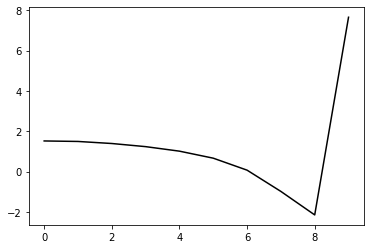

28000 0.1807699091882432
0.7899328029885933 -0.79201120487273 0.14159439927665457 0.07974741737417682
[ 1.58748202  1.47050072  1.34291581  1.18820182  0.96594078  0.61596256
  0.01622096 -1.04629307 -2.27420168  7.59196792]


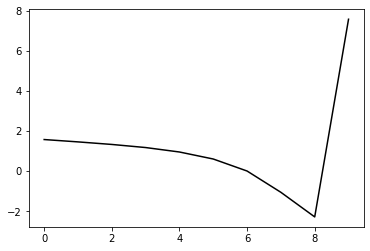

29000 0.28021748693314824
0.7724079606160754 -0.7836723864482374 0.14320375773249316 0.07903034765723965
[ 1.54065876  1.54780918  1.4392823   1.28395765  1.05503288  0.69963828
  0.10732141 -0.9261481  -2.14140348  7.64167171]


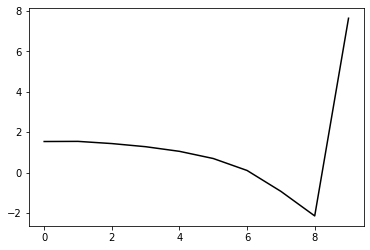

30000 0.19507994705597143
0.746090267227632 -0.7733428766756477 0.14195747597376338 0.0788899786418843
[ 1.5982833   1.49577126  1.40441458  1.28308397  1.08847129  0.757061
  0.18179557 -0.83073469 -2.05219233  7.67723671]


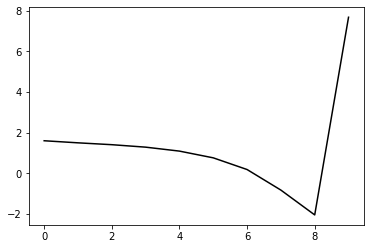

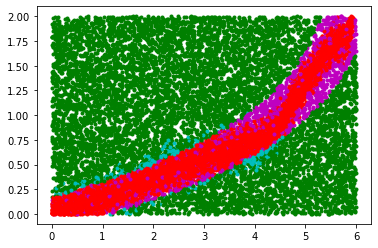

31000 0.2044199482917686
0.7169858227616791 -0.7622180075166917 0.14176111580128087 0.07536379429486564
[ 1.59946054  1.55843805  1.46852489  1.33007515  1.12742089  0.80804761
  0.25064491 -0.75174455 -2.0034836   7.68534192]


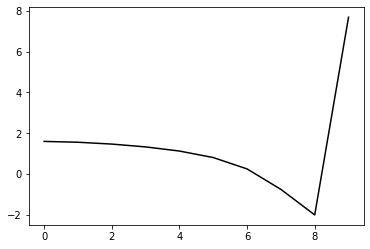

32000 0.20718821250749048
0.7007159613408651 -0.7532804677740794 0.14052127019977306 0.07436220166145613
[ 1.56235597  1.57664685  1.523614    1.41644974  1.22094324  0.89190082
  0.32502903 -0.6847649  -1.97125182  7.68639703]


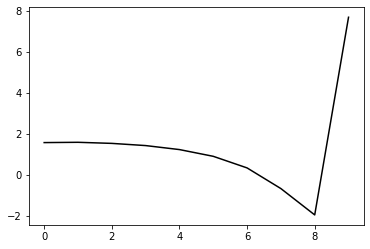

33000 0.17823904632480375
0.6770893560500552 -0.7454906965720844 0.13939417486145886 0.07625788048543998
[ 1.56992968  1.56532077  1.51180855  1.41110331  1.23030932  0.9085332
  0.33491272 -0.68940594 -2.01415854  7.65909047]


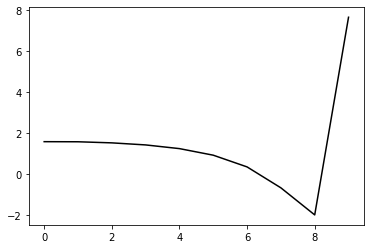

34000 0.3462859895154203
0.6658147711983881 -0.738372426633472 0.1390383087880504 0.0765888947369011
[ 1.51686548  1.61980877  1.60131361  1.51258424  1.33655261  1.02482392
  0.46344424 -0.55295425 -1.88160292  7.73103864]


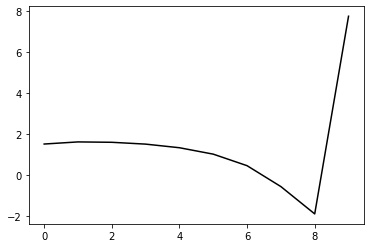

35000 0.2383279789086624
0.6370512715906106 -0.7360258008901821 0.14002990445842442 0.07789154197127274
[ 1.49944033  1.52839622  1.48179363  1.40494233  1.24619843  0.93757519
  0.37186201 -0.63721745 -1.9457717   7.68903018]


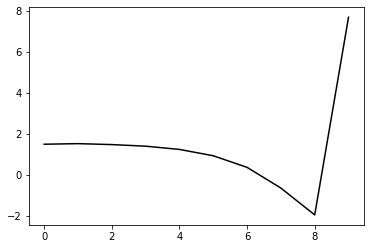

36000 0.1747028230942214
0.6208796367888617 -0.7273629188632625 0.13978849895483558 0.07561744109286371
[ 1.51319594  1.53702711  1.49825584  1.40401408  1.23807922  0.95086437
  0.41702454 -0.57514931 -1.88965027  7.7165535 ]


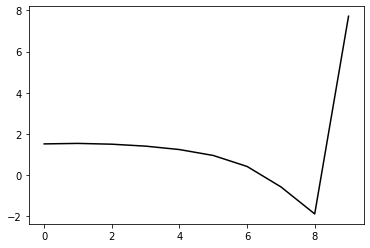

37000 0.1698899057215255
0.6043546409841293 -0.719397897939646 0.1396020285212896 0.07433752492577513
[ 1.51548616  1.51751556  1.46893691  1.35699909  1.16761224  0.86381683
  0.33123765 -0.6493509  -1.95830013  7.69310801]


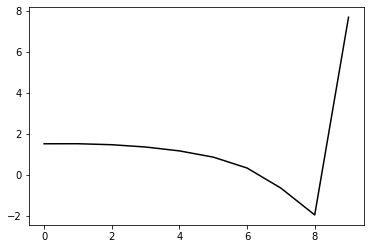

38000 0.209016397909626
0.5889512088446968 -0.7114687429790144 0.1399820815158049 0.07693357415747648
[ 1.51580977  1.58167942  1.51581673  1.4010195   1.22030915  0.91572335
  0.378235   -0.60021695 -1.91982208  7.69774285]


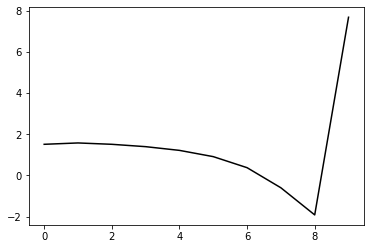

39000 0.14654545470306912
0.5800000258671417 -0.7002599184990322 0.13828185509050933 0.07616057919968942
[ 1.51394638  1.48686894  1.46334756  1.3745455   1.19723048  0.88624616
  0.33632137 -0.65461625 -1.99028345  7.68816132]


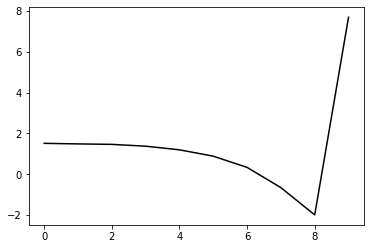

40000 0.22108065145764985
0.5671840771630114 -0.6944899562497119 0.139575853108744 0.0788035811020805
[ 1.50588942  1.55251858  1.49178825  1.38808445  1.21048818  0.9040307
  0.35292042 -0.65097857 -2.00942572  7.68950825]


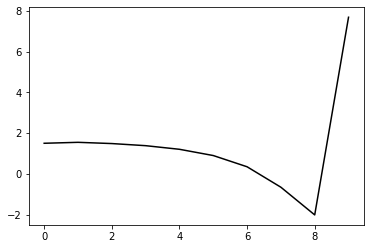

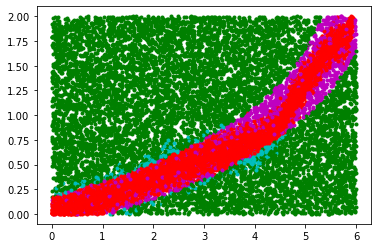

41000 0.16155795605659168
0.560000190021418 -0.6858642058202951 0.14101432284630153 0.07665057334344046
[ 1.51116312  1.50708975  1.48410211  1.40605087  1.24894191  0.96406473
  0.43362804 -0.56037727 -1.92757241  7.69511478]


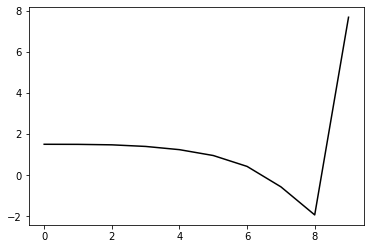

42000 0.2323858598480366
0.546656638733425 -0.6747864398962202 0.13804467194793985 0.07689598676982108
[ 1.45550221  1.53604468  1.48408598  1.3898518   1.22073324  0.91828127
  0.3656487  -0.65382013 -2.05391865  7.66441842]


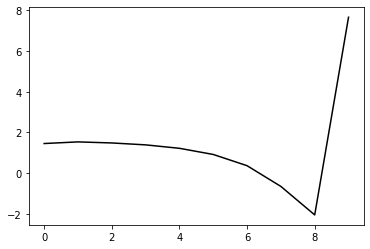

43000 0.18091318254805927
0.5378144551805761 -0.670874641357343 0.140551888813919 0.07671994075220599
[ 1.49620479  1.47238184  1.43065199  1.36677981  1.24217437  0.9884853
  0.48221252 -0.49718255 -1.86796643  7.71929196]


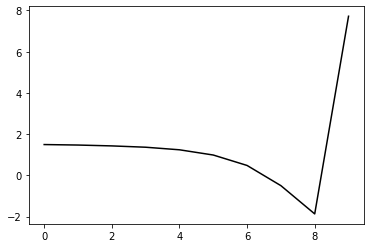

44000 0.1684017989641082
0.514086562190926 -0.6681105242719825 0.14226173831549369 0.07406891451565761
[ 1.50103558  1.46815201  1.35535601  1.23926956  1.07991189  0.81973769
  0.32994996 -0.63037615 -1.99992422  7.62370304]


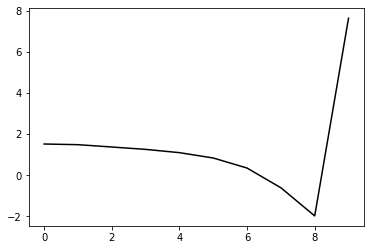

45000 0.21682377068715789
0.5321786971915079 -0.6484332355346366 0.13920946990053798 0.0751498724802868
[ 1.48159139  1.49509046  1.49643168  1.43048969  1.27808144  1.00038024
  0.5026762  -0.44442187 -1.80223918  7.72412685]


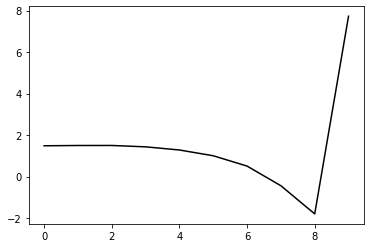

46000 0.24209585759496113
0.5171579021715782 -0.6458998191326564 0.14250247664377275 0.07592909670667855
[ 1.45289579  1.55259819  1.51802733  1.44300635  1.29871575  1.03335819
  0.53514871 -0.41392357 -1.7776077   7.73323296]


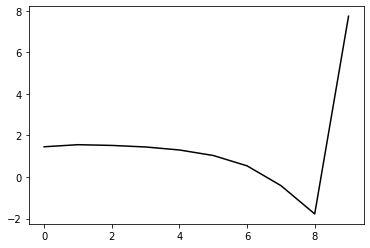

47000 0.3580072909806455
0.5074071009623558 -0.6399114909545447 0.14259708347148015 0.07715238107902188
[ 1.45375734  1.54492616  1.5148416   1.43286627  1.27922525  1.00951608
  0.51717008 -0.41738562 -1.75800383  7.726809  ]


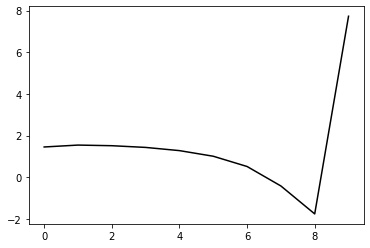

48000 0.14673611701702505
0.4989047365794043 -0.624878782552037 0.13773491452674388 0.07679675996034523
[ 1.49588859  1.41909384  1.3747257   1.297364    1.16320659  0.91809475
  0.44883987 -0.46030667 -1.77433918  7.68146119]


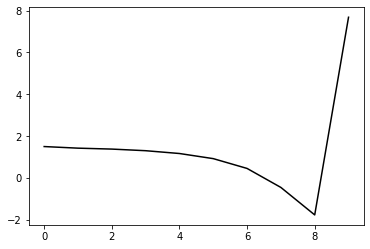

49000 0.19407541598234607
0.4798269111185253 -0.6301483127002877 0.14526847857440686 0.07340404982090586
[ 1.47245437  1.39205611  1.29372605  1.17920742  1.02120967  0.77676913
  0.33120593 -0.53916581 -1.80148856  7.70667084]


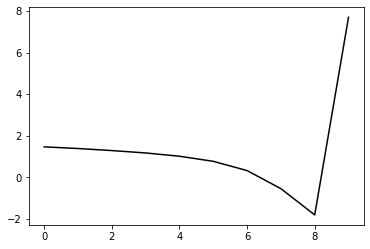

50000 0.27852259417518543
0.483544152519397 -0.615223428658216 0.14193877075097802 0.0798351406796746
[ 1.41921338  1.46081075  1.41873363  1.32434716  1.15986659  0.88693605
  0.42003255 -0.44758861 -1.69262529  7.75890273]


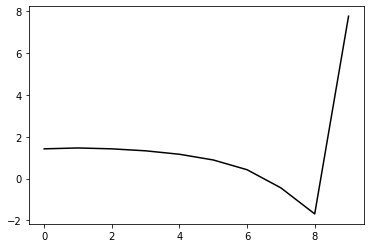

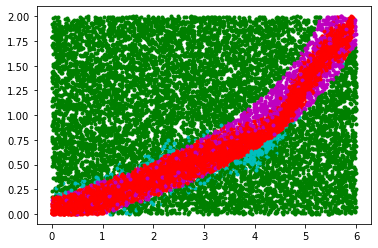

51000 0.31113040626822075
0.47955793137080077 -0.6101237116070812 0.14516938963081077 0.07843766824971699
[ 1.40142912  1.46131085  1.43639464  1.37865242  1.25024544  1.00415262
  0.54325511 -0.31936395 -1.54416263  7.7339934 ]


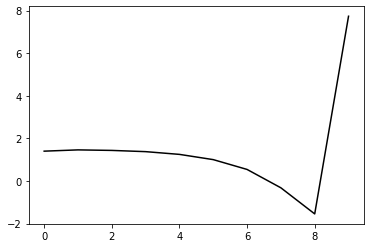

52000 0.31439647543446597
0.47374186772705845 -0.5987254178391572 0.14464382235935544 0.0774884020407931
[ 1.39530488  1.46800807  1.43007548  1.34137669  1.19017629  0.94138607
  0.49426849 -0.35319167 -1.55079204  7.76130088]


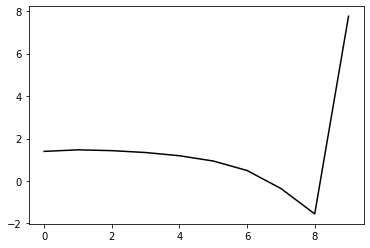

53000 0.2308775607161251
0.4582683245481849 -0.5885779492195871 0.14266389636747434 0.08103856448678612
[ 1.43180187  1.37220157  1.32984999  1.25150274  1.1129962   0.86708249
  0.42127941 -0.41425423 -1.584687    7.79545277]


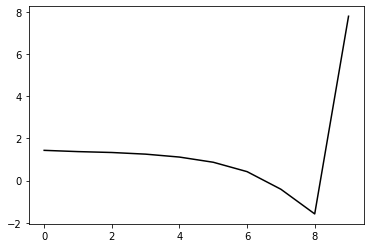

54000 0.1952635308675727
0.4593352950548411 -0.5808142242277161 0.14518942319895314 0.0804987368357033
[ 1.40266187  1.40491783  1.38359476  1.31227577  1.17491474  0.93005206
  0.49042372 -0.33389205 -1.48290074  7.80986474]


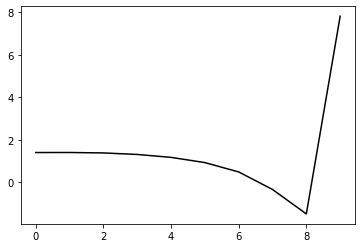

55000 0.20747957654111915
0.44717652044483824 -0.5721803253900943 0.144080708510893 0.07824099905000313
[ 1.39865478  1.42000325  1.36108637  1.26845714  1.12163284  0.87478626
  0.43415218 -0.38226912 -1.50434523  7.77336047]


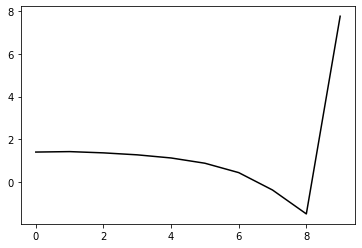

56000 0.17472608100512352
0.4369742672599423 -0.5676287744738862 0.14591228827457553 0.07779531209727289
[ 1.40366904  1.41918749  1.37009983  1.28071389  1.13769765  0.89602025
  0.46135569 -0.34616974 -1.44819135  7.78269501]


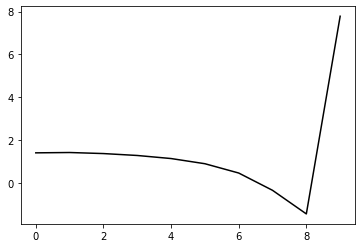

57000 0.2156748050327791
0.4310152919349979 -0.5584143443928913 0.14484528455226764 0.07890984500858027
[ 1.38721125  1.43677906  1.39913046  1.30388219  1.14293614  0.88269533
  0.43283368 -0.38180164 -1.47261395  7.74480854]


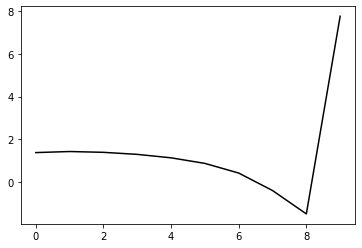

58000 0.2915821312093779
0.42652951523029453 -0.5496945274318732 0.14451943356418992 0.08135471624177797
[ 1.37786749  1.42679794  1.38094403  1.28193044  1.11855986  0.84985673
  0.38744324 -0.43397457 -1.51134712  7.78790413]


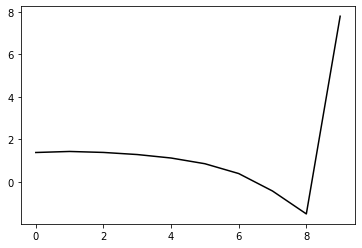

59000 0.26340169037644795
0.417131044088735 -0.5450972499704181 0.14529066935732993 0.07977486522585192
[ 1.37000811  1.40027135  1.32839383  1.24522317  1.09937731  0.83572202
  0.36725826 -0.46142527 -1.52663464  7.76839078]


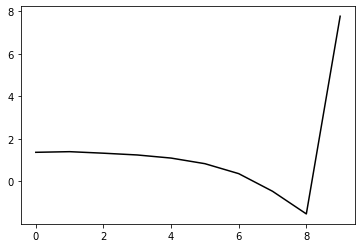

60000 0.19145833980790605
0.41250949662590175 -0.5413028603071499 0.14791332155308873 0.08124415922507389
[ 1.36150264  1.39893841  1.35840632  1.27884225  1.1337728   0.87432313
  0.40942391 -0.42162346 -1.47542369  7.82357472]


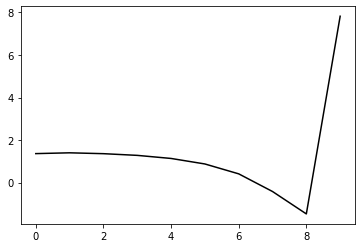

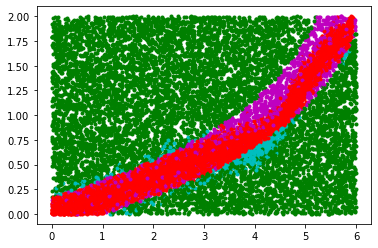

61000 0.19425957837932115
0.4052239767277668 -0.5296445416222798 0.1467146455727412 0.07610669682591349
[ 1.37706783  1.3762591   1.29771791  1.19088993  1.03995417  0.79276227
  0.34527571 -0.47616387 -1.52125043  7.75120996]


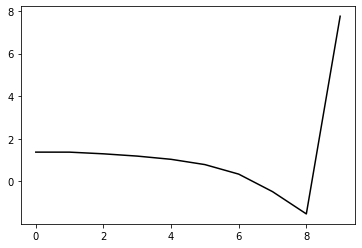

62000 0.1532685544306279
0.4006152718535479 -0.5279834170248625 0.15001104869525186 0.07915700592103969
[ 1.38436253  1.38372679  1.31424286  1.22712781  1.10400529  0.88429529
  0.46598177 -0.31827492 -1.31754412  7.82857974]


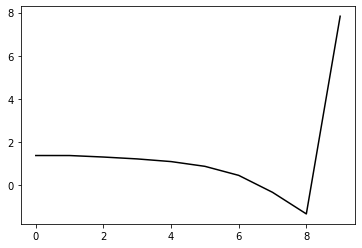

63000 0.20765846854694744
0.3916722912260246 -0.5204623176055324 0.14886721384552315 0.08073987227685414
[ 1.38066609  1.35782157  1.26264262  1.16382244  1.01614653  0.77477588
  0.35546423 -0.41413587 -1.38942098  7.78216144]


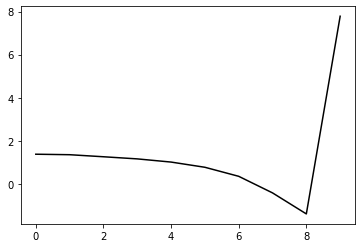

64000 0.18627733965883408
0.39456012654792144 -0.5091779940878645 0.14830420431416552 0.07967976136265213
[ 1.38546426  1.38377927  1.34712626  1.25245573  1.0951559   0.83919218
  0.4069029  -0.36265963 -1.32870137  7.83596963]


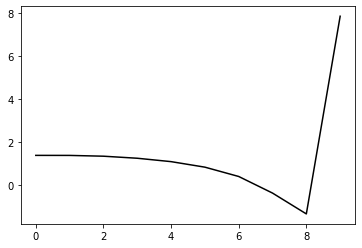

65000 0.20379327266414307
0.39105799124039636 -0.5036893944521614 0.149950965703876 0.08067066080460429
[ 1.41535834  1.39761897  1.35534809  1.2518366   1.09736423  0.8573531
  0.43940881 -0.31177268 -1.24516045  7.80702708]


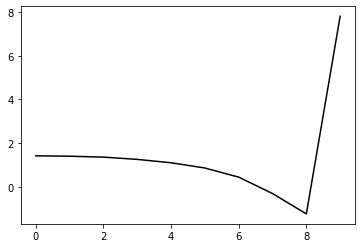

66000 0.21398759189349048
0.3831159719212376 -0.49758350030456466 0.14962876625756527 0.0775380187515052
[ 1.38668756  1.28629766  1.21542977  1.10895278  0.93601772  0.66150705
  0.21236787 -0.5570929  -1.49196447  7.76571794]


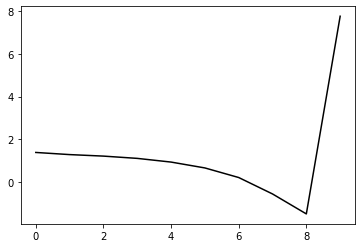

67000 0.22748301427018056
0.38242120499347965 -0.49309569120051394 0.15154322923894498 0.07899149417508149
[ 1.36413043  1.32916312  1.25703519  1.14096699  0.96699809  0.68964129
  0.23029516 -0.54670554 -1.46800749  7.77875338]


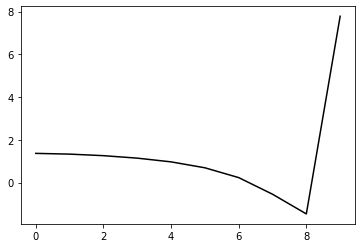

68000 0.24437780110010815
0.3754387337915044 -0.4862659809000185 0.15216813932151377 0.08051738641713772
[ 1.3818128   1.41394603  1.36246883  1.2745564   1.12918215  0.87703464
  0.43389888 -0.33852959 -1.25010838  7.80344337]


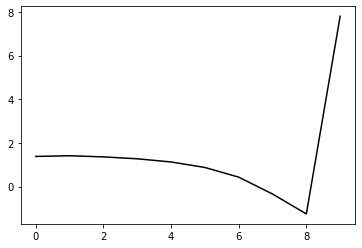

69000 0.18375885055821362
0.366594507145811 -0.4815909465120808 0.1538345846878668 0.08006841403636242
[ 1.37551221  1.30184626  1.2548573   1.17988566  1.03388455  0.78868432
  0.35436138 -0.41665358 -1.32348094  7.75487548]


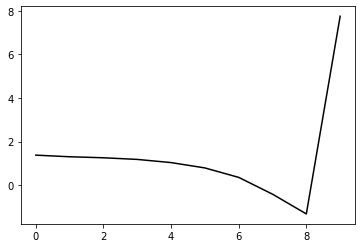

70000 0.24594683268865603
0.35811313659870186 -0.47017760494812955 0.1515662183944737 0.07493830858828242
[ 1.41132205  1.32293211  1.24300277  1.1469058   1.01164821  0.78305065
  0.36538385 -0.39699203 -1.30596305  7.79414283]


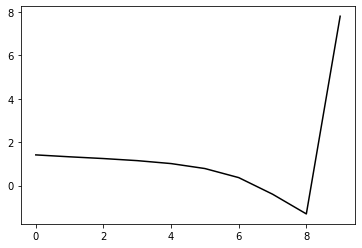

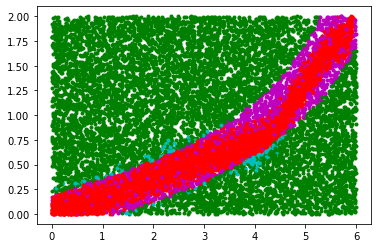

71000 0.25669167068406346
0.3549227542708788 -0.46787530654180837 0.1545426257747131 0.07494338119218356
[ 1.38560474  1.36311384  1.29525659  1.21252677  1.06965435  0.83457534
  0.4309019  -0.30389373 -1.18267136  7.83008539]


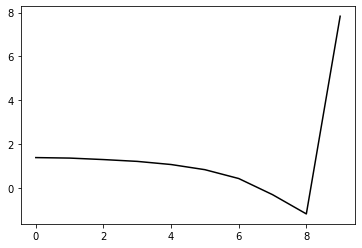

72000 0.23164796699138485
0.34767444180997964 -0.4675383900942904 0.1568823528592425 0.07740396968576638
[ 1.39020299  1.33330813  1.24701492  1.13718851  0.9801876   0.73166347
  0.31475282 -0.41281249 -1.26675927  7.78965433]


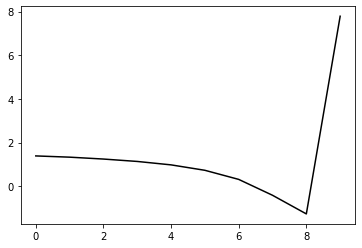

73000 0.17354351135467838
0.3507210654347599 -0.453502686092524 0.15261596024944096 0.0797958140556049
[ 1.36995744  1.40200167  1.36024257  1.28303413  1.14859463  0.90871714
  0.48930069 -0.23920384 -1.08555214  7.86634954]


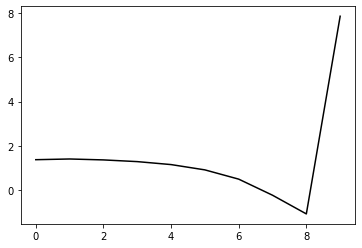

74000 0.21066082269119615
0.344700840431615 -0.45097671271433487 0.15521189660520301 0.07858410631295527
[ 1.38887288  1.3257597   1.28210247  1.21196717  1.08577381  0.85575498
  0.44511318 -0.27834526 -1.11052981  7.86874613]


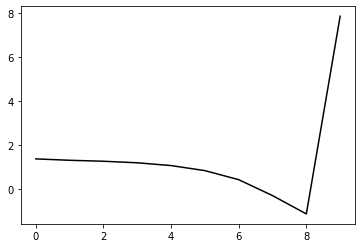

75000 0.2814418554718795
0.33903280747660824 -0.44760500563052 0.157810904815748 0.07548290213918063
[ 1.38072599  1.32151676  1.24333428  1.13497288  0.96853616  0.71592955
  0.29459597 -0.43962838 -1.27885835  7.80075123]


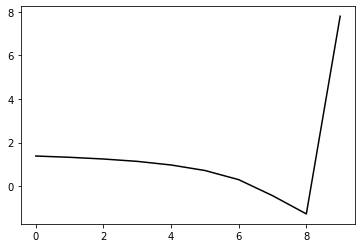

76000 0.24556321190093097
0.34186463969981973 -0.4370993948199146 0.15658489027700867 0.07975812696437448
[ 1.33809208  1.42452661  1.39323128  1.31608614  1.17071286  0.91883637
  0.49093988 -0.24378962 -1.07677993  7.87327032]


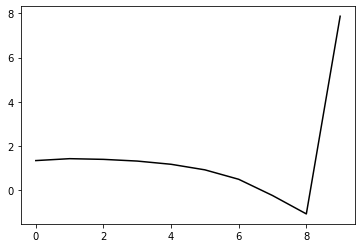

77000 0.28021092803721787
0.3403827053099668 -0.43103912894914964 0.1565503848566872 0.08067533743736759
[ 1.33421654  1.34753116  1.31510084  1.22184907  1.06620347  0.81362051
  0.38210503 -0.35701654 -1.18058076  7.83103954]


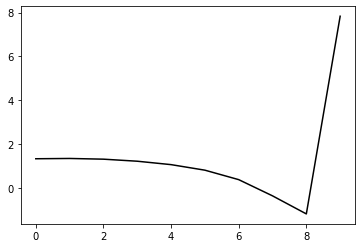

78000 0.21919162742324477
0.33277456484037793 -0.428390304014822 0.15660744786515068 0.08397309031900561
[ 1.32971632  1.38634935  1.32633454  1.22317163  1.0655443   0.81228558
  0.38207688 -0.35517755 -1.16674362  7.8571322 ]


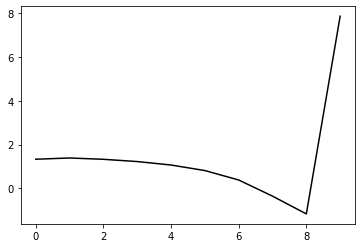

79000 0.1756275505724081
0.3286813379785873 -0.4179433402384248 0.15463029763634023 0.08328372939247478
[ 1.34488466  1.35693512  1.33391374  1.25179491  1.09995116  0.84325438
  0.40569328 -0.34299344 -1.16795952  7.84468556]


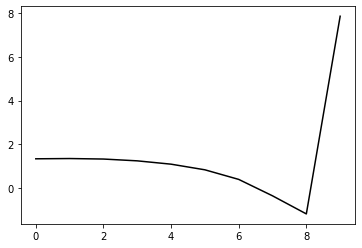

80000 0.19878192192576657
0.3245245607332884 -0.4168089269930036 0.1585247833976724 0.0820973750427869
[ 1.31076279  1.34663649  1.32848687  1.27545118  1.15897947  0.93961439
  0.53543395 -0.18614884 -0.98273266  7.86401492]


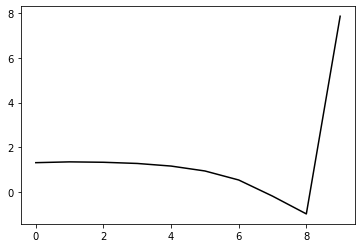

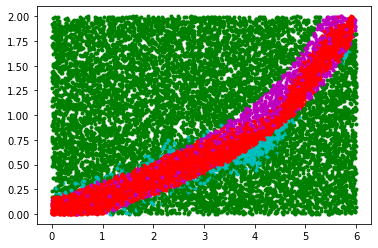

81000 0.253034620349263
0.3141849300083949 -0.4120572817929877 0.15632414760128494 0.08259453242720283
[ 1.37456101  1.24117919  1.1295744   1.02320231  0.87087992  0.63355107
  0.23251751 -0.47391807 -1.24715039  7.78427545]


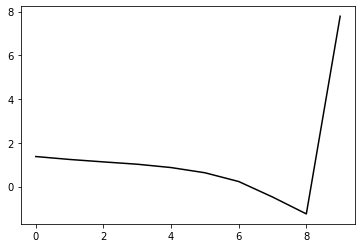

82000 0.2646234837960075
0.31808746874853727 -0.4084014017630344 0.15997606704351636 0.08348135822148521
[ 1.2892941   1.30046053  1.25750067  1.19090875  1.05993142  0.82209599
  0.41403534 -0.28724616 -1.05044707  7.86372397]


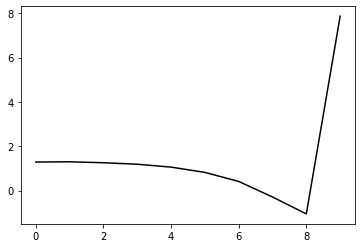

83000 0.19592393397619814
0.31373181276146384 -0.39822917632401394 0.15762943105910718 0.08365270944347704
[ 1.36246011  1.3019527   1.26806851  1.17208336  1.01762585  0.77602286
  0.3703281  -0.33124281 -1.09112135  7.87868513]


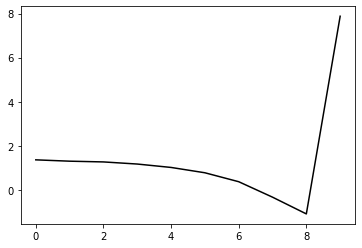

84000 0.16709053771062907
0.3062157715156352 -0.39772124438133005 0.15980758833363115 0.08547113270539357
[ 1.28691755  1.30172269  1.23011252  1.12937295  0.98197869  0.75415691
  0.36287121 -0.3203959  -1.05473486  7.86834054]


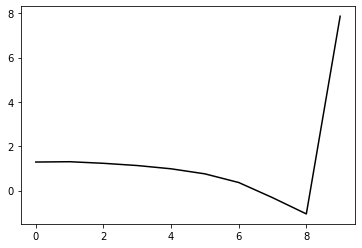

85000 0.2176179049855661
0.3066540160930526 -0.3928582762469439 0.15956630054238558 0.08616413250463073
[ 1.29254939  1.2409761   1.21023391  1.13089033  0.98668848  0.75056119
  0.35697968 -0.31387351 -1.02197487  7.87566763]


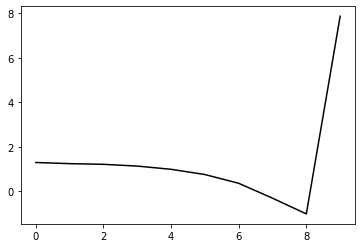

86000 0.199478273740205
0.3055933939639577 -0.3941110890848901 0.16418904564519787 0.08487988626048527
[ 1.28040612  1.27249405  1.23670601  1.15367655  1.01504403  0.78332484
  0.39395559 -0.26508655 -0.94549035  7.86130742]


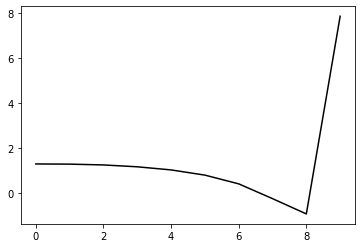

87000 0.19434109697331656
0.30350803439933693 -0.3848053672062249 0.1611682030085397 0.08464613350418149
[ 1.29730199  1.2471364   1.19174495  1.09657598  0.95138791  0.72273931
  0.33686356 -0.31810132 -0.9820632   7.85556532]


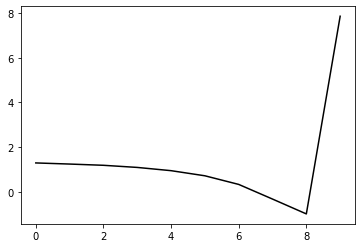

88000 0.17409072280959376
0.30001658720197083 -0.3831449805251378 0.1634997373145897 0.08726341715630646
[ 1.26369208  1.32333665  1.24125203  1.12956894  0.97054872  0.72369095
  0.32516838 -0.33492063 -0.99262771  7.88531393]


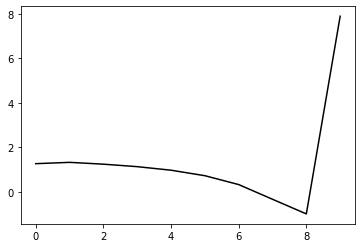

89000 0.2322718114199477
0.29476468519892585 -0.3798878550222312 0.16525680529699938 0.08247799616986014
[ 1.30151591  1.25207378  1.15737824  1.054541    0.91160407  0.68044783
  0.29063744 -0.36097972 -1.00310664  7.87549996]


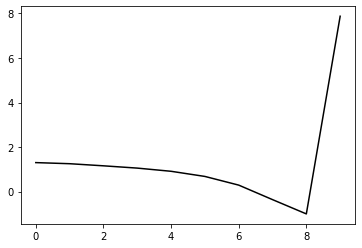

90000 0.17288334873820205
0.2929133773337144 -0.3659088264829184 0.15913045984386767 0.08516670049502964
[ 1.31628487  1.29250996  1.24542037  1.16155073  1.01110063  0.76557017
  0.36475041 -0.29404086 -0.93265425  7.87319124]


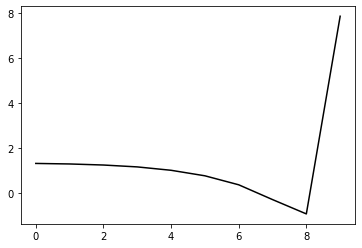

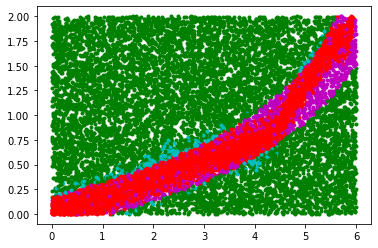

91000 0.20303863232021066
0.2920882862544605 -0.3656583432907721 0.1627652308436225 0.08858792714832821
[ 1.25641138  1.27943398  1.21140929  1.0999892   0.94875377  0.71247874
  0.31845964 -0.32759328 -0.93514233  7.89556709]


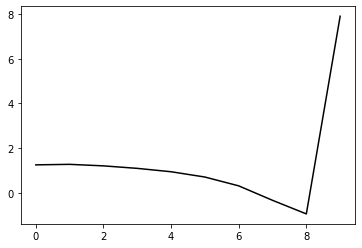

92000 0.2828240980526452
0.2886594453491637 -0.36338745754971696 0.1640981601432826 0.09057818137311484
[ 1.23786986  1.24107706  1.17271417  1.07732188  0.91609105  0.65929399
  0.25335274 -0.39905315 -1.00081909  7.87544955]


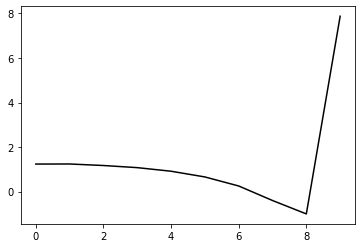

93000 0.1658302284559784
0.27890842654969933 -0.36262497030797064 0.16544984069895793 0.08835275703723632
[ 1.2928221   1.13444097  1.03260669  0.91454069  0.75070658  0.50315838
  0.10097251 -0.54856743 -1.13857126  7.82305424]


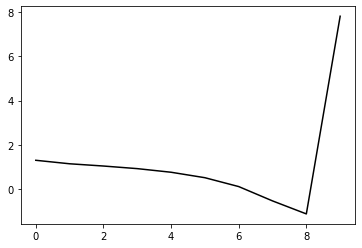

94000 0.2197299421374736
0.27967736301198587 -0.3566281167509642 0.16686917531871562 0.08567766380870513
[ 1.24712903  1.12253674  1.01668035  0.91813365  0.76934475  0.5169666
  0.10031928 -0.5669847  -1.1714529   7.79062362]


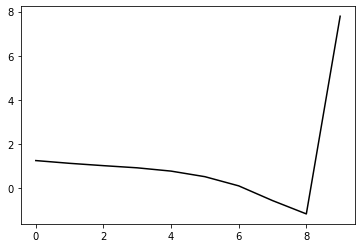

95000 0.17994934876915422
0.28309437239851315 -0.34559136235859816 0.16530234734713553 0.09080364184314037
[ 1.24576941  1.29947358  1.24116433  1.12763639  0.96151     0.70484207
  0.29175038 -0.37540317 -0.97814916  7.91681102]


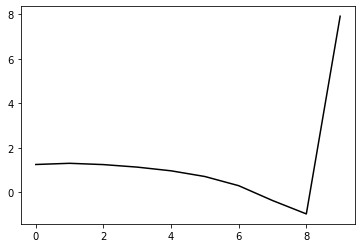

96000 0.2233033529535968
0.2769665753535456 -0.34109760435626135 0.16458745076446651 0.09095012858084754
[ 1.27030576  1.18009253  1.11473424  1.01112104  0.84525827  0.58908993
  0.17512996 -0.49490526 -1.09899331  7.83542307]


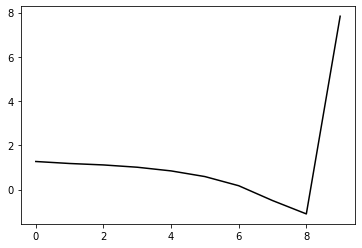

97000 0.31552376777560676
0.281182743642496 -0.3430847197937369 0.17060893350313583 0.09171979577022885
[ 1.21017926  1.2375125   1.18514197  1.10537933  0.96390246  0.71788979
  0.31202018 -0.34487665 -0.92863442  7.86599201]


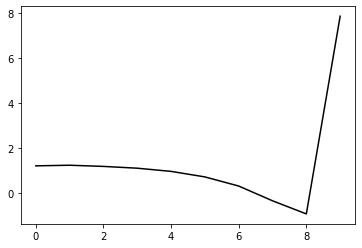

98000 0.15008895131235267
0.2811641498913865 -0.3379453322629125 0.1702719539110708 0.09288604809501266
[ 1.24214801  1.19442486  1.1267563   1.0179931   0.8585596   0.60589877
  0.19471293 -0.4682529  -1.05033779  7.87222726]


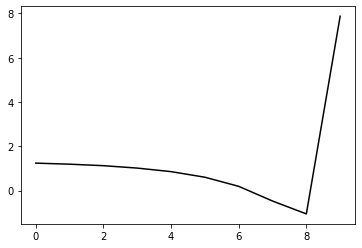

99000 0.12740728406637802
0.2792751768977335 -0.33030100439177906 0.16930412803792527 0.0911832784406663
[ 1.2545917   1.22904249  1.14890376  1.03114806  0.87148388  0.62919487
  0.22996534 -0.42635333 -1.00670314  7.89114513]


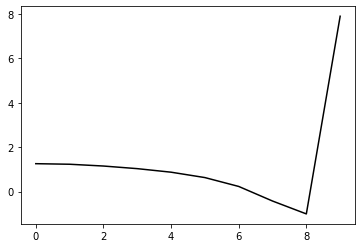

In [17]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for j in range (10000):    
    with tf.GradientTape() as g:
        loss=Error_func(h, m2, lam, alpha, beta, Positive[j%set], Negative[j%set])
        gradients=g.gradient(loss, [h, m2, lam, alpha, beta])
        if np.isnan(loss)==True: break
    for i in range (90):
        optimizer.apply_gradients(zip(gradients, [h]))
        if any(np.isnan(h.numpy()))==True: break
    for i in range (10):
        optimizer.apply_gradients(zip(gradients, [h, m2, lam, alpha, beta]))
        if any(np.isnan(h.numpy()))==True: break
    if j%100==0: 
        print(j*10, Error_func(h, m2, lam, alpha, beta, Positive[np.int32((j/set)%set)], Negative[np.int32((j/set)%set)]).numpy())
        print(m2.numpy(), lam.numpy(), alpha.numpy(), beta.numpy()), print(h.numpy())
        plt.plot(h.numpy(), 'k-'), plt.show()
    if j%1000==0:
        for i in range (set):
            [Positive0[i], Positive1[i]]=NN_func_01(h, m2, lam, alpha, beta, Positive[i])
            [Negative0[i], Negative1[i]]=NN_func_01(h, m2, lam, alpha, beta, Negative[i])
        for i in range (set):
            x_data1[i]=[v[0] for v in Positive0[i]]
            y_data1[i]=[v[1] for v in Positive0[i]]
            x_data2[i]=[v[0] for v in Positive1[i]]
            y_data2[i]=[v[1] for v in Positive1[i]]
            x_data3[i]=[v[0] for v in Negative0[i]]
            y_data3[i]=[v[1] for v in Negative0[i]]
            x_data4[i]=[v[0] for v in Negative1[i]]
            y_data4[i]=[v[1] for v in Negative1[i]]
            plt.plot(x_data4[i], y_data4[i], 'g.')
            plt.plot(x_data2[i], y_data2[i], 'c.')
            plt.plot(x_data1[i], y_data1[i], 'r.')
            plt.plot(x_data3[i], y_data3[i], 'm.')
        plt.show()

0 0.24070048400659727
0.2800469786195849 -0.32519782684629667 0.16499054272371066 0.10190665833819805
[ 1.217727    1.16658174  1.08304183  0.97190062  0.8136746   0.57329203
  0.1871674  -0.44590143 -0.99917807  7.84592793]


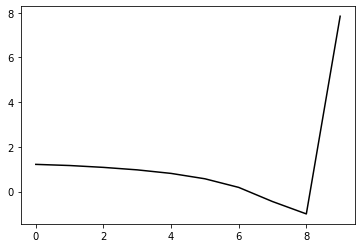

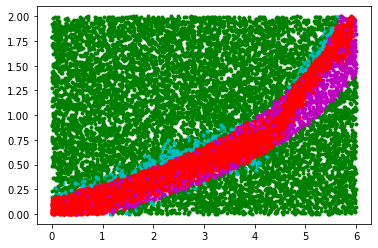

1000 0.3893551578293916
0.27846638213042885 -0.3299883304054303 0.17589317693379417 0.09915583908070351
[ 1.14821608  1.17163258  1.09927315  0.98850149  0.81899468  0.57032424
  0.1834057  -0.43931999 -0.97719516  7.85147615]


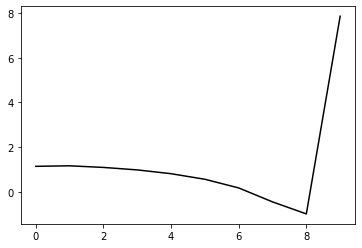

2000 0.21277294264600438
0.27282942795975923 -0.32506826544011475 0.17688215382152395 0.09918087826901743
[ 1.20909089  1.13039854  1.01013978  0.88405971  0.70241958  0.44288655
  0.0492687  -0.5734339  -1.10691735  7.86526571]


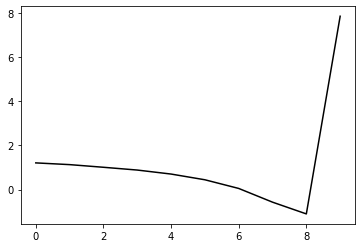

3000 0.36876953920879574
0.2778520212480007 -0.3175442520425406 0.17812154653470855 0.09714308834131943
[ 1.1728179   1.23301417  1.15622737  1.03902968  0.86356048  0.59972431
  0.19515828 -0.43194378 -0.96189279  7.90399084]


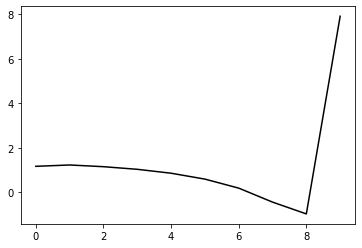

4000 0.24380817863382068
0.2700648768990561 -0.31392962517414413 0.1773047637469137 0.09204209463488512
[ 1.24312392  1.09972288  0.94456639  0.80488782  0.62889016  0.3665497
 -0.04089613 -0.66743566 -1.18141951  7.8291299 ]


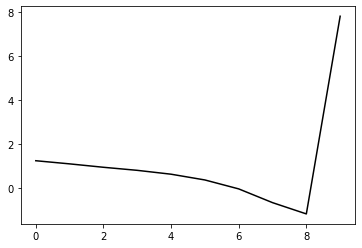

5000 0.1481034108386703
0.27440094772643886 -0.306318135361623 0.17607368304925666 0.09676078810009102
[ 1.1971584   1.20173886  1.13444821  1.02096053  0.83354558  0.54735858
  0.11423606 -0.53757494 -1.06709594  7.85439164]


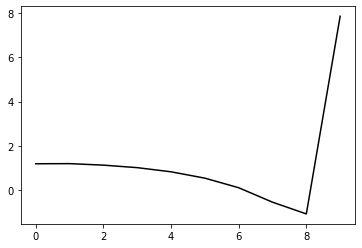

6000 0.3031645252852578
0.2720359311516092 -0.3024876229425067 0.17759090972754188 0.09556891999679785
[ 1.20936948  1.15331352  1.08723775  0.99247181  0.83885738  0.57769018
  0.15273004 -0.50327161 -1.03254874  7.88429569]


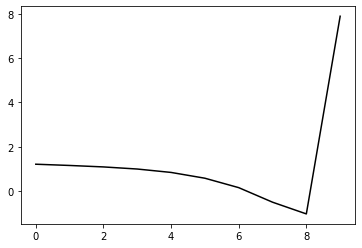

7000 0.27336755848488914
0.27336889686645943 -0.29950395316264483 0.1791784168754826 0.09510884649517316
[ 1.18573268  1.214877    1.15896529  1.04407814  0.87105043  0.59865512
  0.16476534 -0.50831271 -1.05158869  7.85455345]


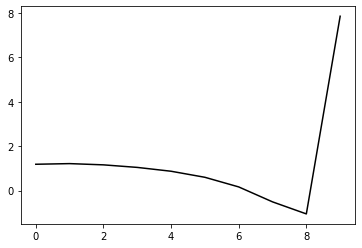

8000 0.2610228348350404
0.26786837868591457 -0.293785789964667 0.17762433032570815 0.09793591471900132
[ 1.23066309  1.19837867  1.13918192  1.03673933  0.86686734  0.60176376
  0.17914834 -0.48961257 -1.03344692  7.86870188]


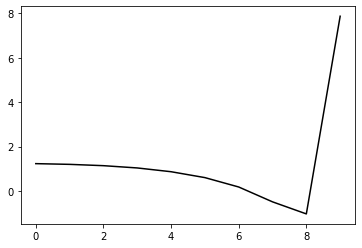

9000 0.27677127776522237
0.26514857387256224 -0.2930783197206634 0.1810521930828289 0.09491390043497927
[ 1.21129245  1.24221357  1.17612447  1.06525375  0.89850045  0.64132973
  0.22492263 -0.44208947 -0.99071431  7.87319885]


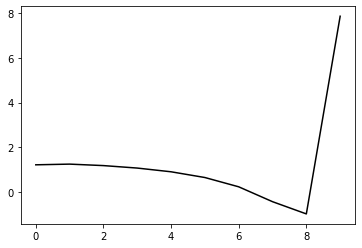

10000 0.19234796847770344
0.260660214137994 -0.28759810614967046 0.17991987073630566 0.09615575726667179
[ 1.22405746  1.23755447  1.16941661  1.04867822  0.88051478  0.63037042
  0.22652805 -0.42934713 -0.97843724  7.89223664]


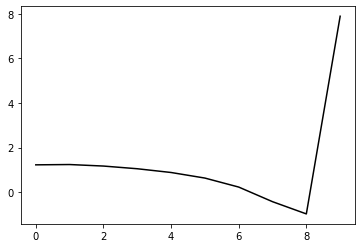

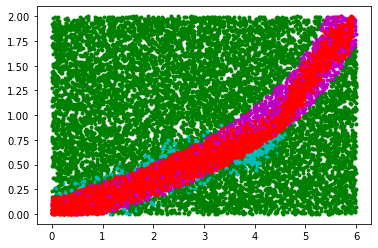

11000 0.3507081151338276
0.26272561884685625 -0.2858712940951554 0.18216091376038818 0.09191440353695451
[ 1.19864332  1.21387095  1.15128558  1.03753459  0.87119308  0.61546535
  0.20505217 -0.45083016 -1.00137866  7.89590678]


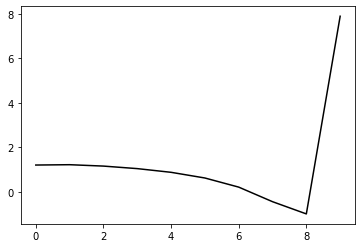

12000 0.1879578375884955
0.25468953080428886 -0.2801520859547132 0.1784861402641825 0.09584899987584614
[ 1.25281199  1.17374442  1.10081266  0.98467119  0.80716882  0.53754905
  0.11663419 -0.54427369 -1.09547819  7.837608  ]


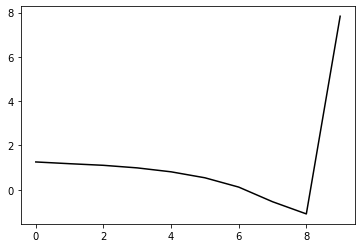

13000 0.2136194179441275
0.25608756845179015 -0.2801933473743624 0.18192030115070632 0.09575486272791031
[ 1.22439015  1.24975505  1.1900597   1.07194279  0.89294008  0.62655957
  0.20819907 -0.4493697  -0.99421895  7.87948228]


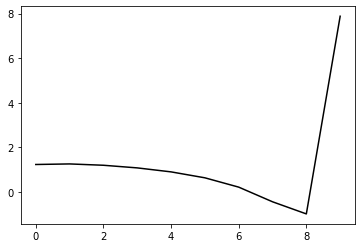

14000 0.14848288174389448
0.25542215301220034 -0.27803622108578485 0.18325259000137462 0.09412668029363566
[ 1.24256024  1.29908925  1.23334036  1.11967945  0.95003656  0.68838759
  0.27390818 -0.38036601 -0.92290084  7.89434225]


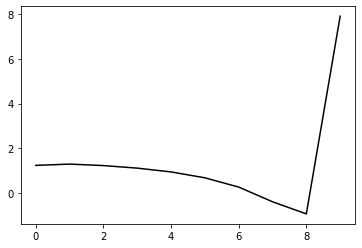

15000 0.18392125713336763
0.25841826177514665 -0.2753874140570334 0.18487955972792544 0.09288696827853182
[ 1.2336412   1.23205768  1.12579737  1.01691945  0.86914725  0.61963936
  0.20788083 -0.4393446  -0.96708643  7.90061217]


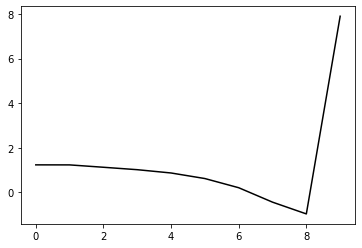

16000 0.6523839673202224
0.25067363171679924 -0.28875683952697845 0.19541359094029043 0.087152479997421
[ 1.21321553  1.02102439  0.92162234  0.82306823  0.67048174  0.42605236
  0.03209865 -0.59478119 -1.09603638  7.81958561]


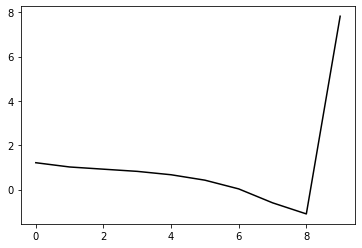

17000 0.22160239231173381
0.25797243348118815 -0.271800339098872 0.18644878205515153 0.09780155445042839
[ 1.22772725  1.25463537  1.1692386   1.05128571  0.87389059  0.59881512
  0.17230378 -0.48332386 -1.0105997   7.88475143]


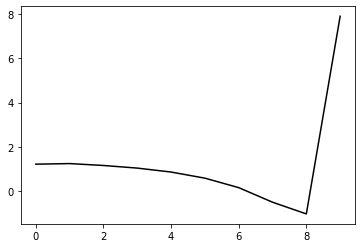

18000 0.22290096774192455
0.25711704950018205 -0.2602273790170397 0.1817076962442032 0.09793324417155908
[ 1.22811436  1.24644264  1.17630934  1.05812689  0.88412718  0.61263116
  0.17981462 -0.49181432 -1.03788531  7.87080406]


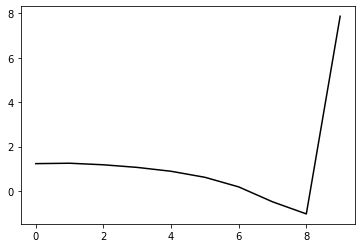

19000 0.2033157137527289
0.24860575045346867 -0.26551264342790265 0.18560562049979595 0.09591965997787197
[ 1.25197006e+00  1.11299571e+00  9.96612751e-01  8.58742783e-01
  6.77449839e-01  4.12826350e-01 -3.61258531e-03 -6.58380125e-01
 -1.18396143e+00  7.80576878e+00]


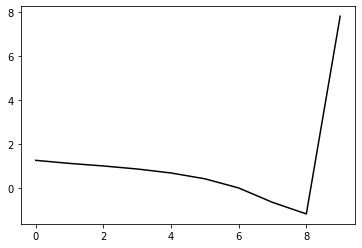

20000 0.1970394729377363
0.2516082648089921 -0.2653695137999939 0.18949147393589882 0.09610530865534084
[ 1.25147919  1.14643215  1.08081381  0.98895922  0.8457764   0.60523928
  0.20960927 -0.42060136 -0.92151375  7.89801887]


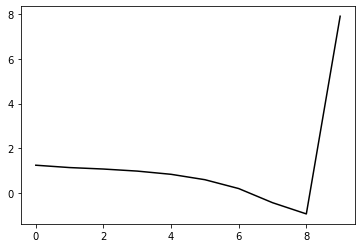

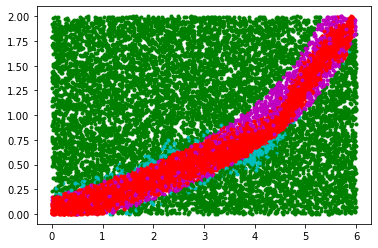

21000 0.17925197204904297
0.2568300247221905 -0.2594784271080378 0.18867605265302012 0.09400022496790278
[ 1.25700792  1.20264188  1.12629113  1.01072478  0.83696248  0.56041194
  0.13316497 -0.52165885 -1.04140568  7.84058996]


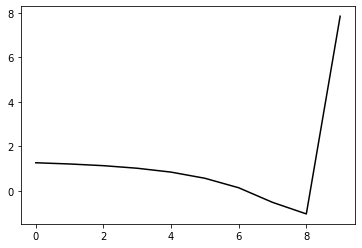

22000 0.1801230306645516
0.25519429142167793 -0.2564244395515653 0.18877020776975773 0.09566273741941958
[ 1.25008295  1.25861249  1.20622272  1.10343562  0.93227357  0.65968644
  0.23103914 -0.42750789 -0.9465129   7.87514056]


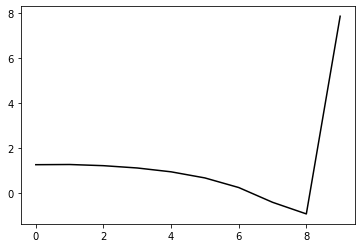

23000 0.21832945603462536
0.2512956814556044 -0.2519052877877616 0.18654713442476045 0.09464504317829349
[ 1.28004873  1.20579401  1.13136083  1.01390759  0.83089219  0.55407745
  0.12106895 -0.54376639 -1.05951446  7.85155292]


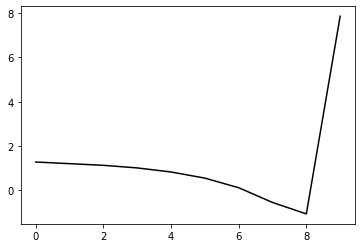

24000 0.09502359804627585
0.2529010467390208 -0.2529205444791041 0.1900291379982029 0.09527227989591394
[ 1.24416979  1.27643931  1.21533101  1.10374549  0.92541785  0.6443361
  0.20707419 -0.45898355 -0.97076472  7.87973778]


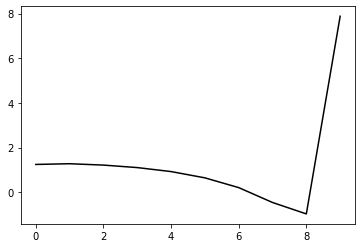

25000 0.1936727956388552
0.2505971529120026 -0.2513656334890638 0.19093767324578018 0.09222962967127213
[ 1.25762827  1.19220187  1.08430102  0.95894955  0.78559362  0.51144992
  0.07463591 -0.59412975 -1.10329504  7.87169904]


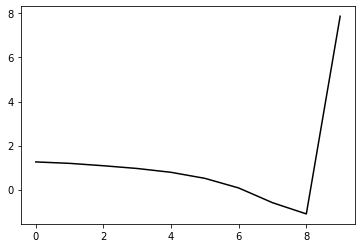

26000 0.18396395036113175
0.2497449840741506 -0.24981694541776353 0.19131149643918247 0.0957486621366469
[ 1.26246597  1.17665794  1.13775205  1.05469489  0.88840115  0.60370419
  0.15295028 -0.52566032 -1.0358771   7.85886476]


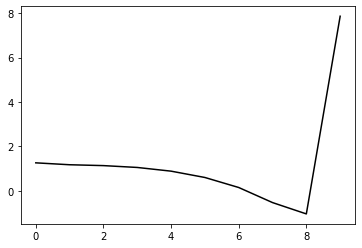

27000 0.19712123995298103
0.2446571799601614 -0.25059055612951325 0.19220840412499574 0.09439799722750228
[ 1.26647130e+00  1.14206458e+00  1.04256995e+00  9.15846148e-01
  7.32743715e-01  4.47714800e-01 -5.11703531e-03 -6.96198701e-01
 -1.21420828e+00  7.80474875e+00]


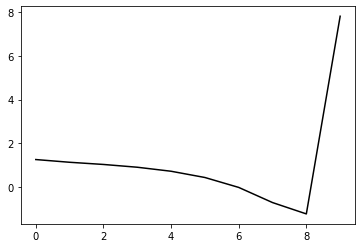

28000 0.21735674102263836
0.24975948789671115 -0.2468403255662632 0.19422052730913375 0.09632348099616195
[ 1.25149705  1.15679562  1.09582854  1.00639742  0.84794712  0.57869419
  0.13982891 -0.54139629 -1.05143195  7.84958372]


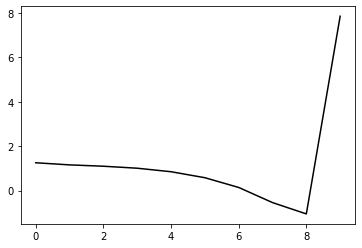

29000 0.2128482224203505
0.24700373574579626 -0.2426738545016732 0.19301941254191365 0.09775722717044953
[ 1.2713253   1.17256467  1.08483001  0.9488431   0.75803156  0.48061989
  0.04263653 -0.64333241 -1.16671386  7.80089832]


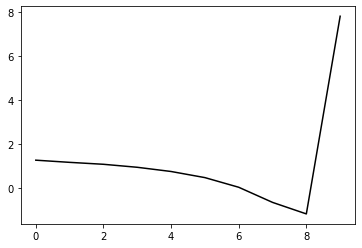

30000 0.20428950751548028
0.24743177663093435 -0.24122928807493393 0.1942073399364063 0.09653437136956597
[ 1.2191563   1.20054651  1.11170459  0.99044945  0.80635278  0.51930522
  0.07033945 -0.62219878 -1.16054477  7.83527163]


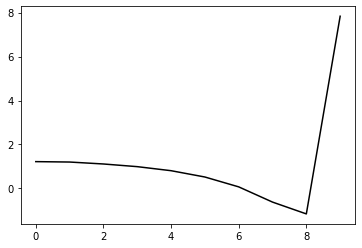

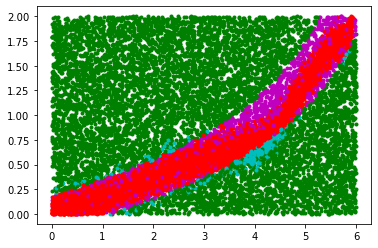

31000 0.1727167919362507
0.2454819664277385 -0.23687347270456358 0.1916342810616316 0.10170167559113799
[ 1.22320382  1.2007378   1.13904633  1.03853849  0.86437282  0.57719455
  0.117882   -0.58662401 -1.1365575   7.8434104 ]


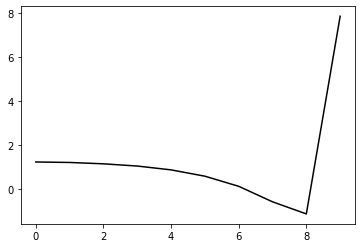

32000 0.21398666555588866
0.2412874378307755 -0.23589669941265404 0.19198692223005498 0.09885130327969907
[ 1.25247898  1.12584011  1.0379886   0.91341982  0.72208039  0.43568878
 -0.01887369 -0.72645028 -1.28293656  7.79707935]


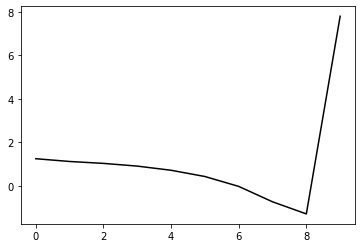

33000 0.2912376120410145
0.24219747317752072 -0.2416391956041739 0.19777421139915977 0.10228697413131269
[ 1.1752125   1.1856739   1.10858681  1.00430702  0.84606021  0.58079111
  0.14376091 -0.54262133 -1.07727042  7.8370418 ]


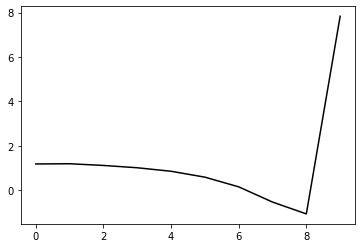

34000 0.2651513813790085
0.24183604983440773 -0.23260972538393107 0.19399218296066179 0.10169258731565861
[ 1.2125703   1.23487219  1.17123688  1.03865603  0.84301168  0.56259963
  0.12656786 -0.56317668 -1.11296248  7.8584754 ]


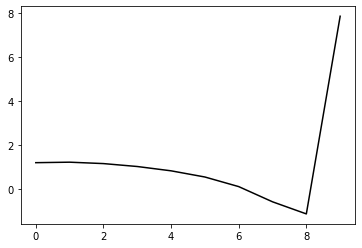

35000 0.1461579206326958
0.2382468300003492 -0.23106310897081317 0.19522217833593855 0.09937686960739205
[ 1.22925768  1.207489    1.13401005  1.03156025  0.87539902  0.62030074
  0.19730861 -0.4787459  -1.02447318  7.88779095]


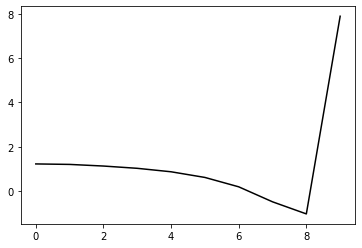

36000 0.20976981647939127
0.23960187383810885 -0.23509915674728019 0.200481667460718 0.09848319683564308
[ 1.20926544  1.22311295  1.158782    1.05781335  0.89626981  0.64275025
  0.23063751 -0.43069227 -0.96253805  7.84331443]


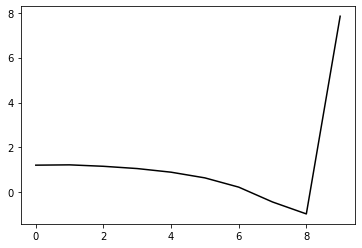

37000 0.14515137135116904
0.24032720393958718 -0.22784687618178037 0.19750369684166005 0.0955300550388243
[ 1.23091162  1.21140291  1.11634666  0.97909327  0.79207402  0.51111908
  0.0761155  -0.59864434 -1.14167579  7.84583871]


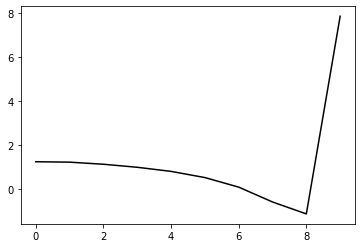

38000 0.22010399292085728
0.24210941159209934 -0.22697489539403712 0.19925755026222516 0.09591217007898785
[ 1.2431693   1.26916233  1.21449802  1.08661791  0.89810993  0.61033046
  0.16371414 -0.51666006 -1.05684829  7.84740811]


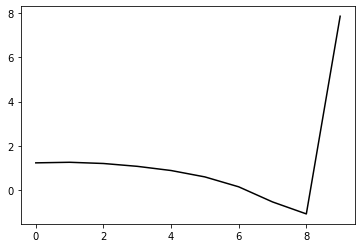

39000 0.14501190758882168
0.2430494571167048 -0.22261518152181137 0.19781627293638937 0.09684747428950798
[ 1.25047886  1.20513758  1.13966828  1.00597903  0.81155309  0.52227635
  0.06769183 -0.62482242 -1.16861204  7.84965081]


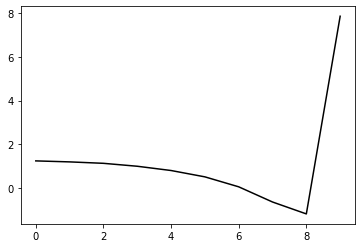

40000 0.20134797584613673
0.24184328280866055 -0.22264170781719428 0.1984723832985916 0.09928356440118667
[ 1.26708368  1.24641516  1.18092077  1.05431798  0.86491676  0.56936303
  0.10627065 -0.59519137 -1.14050558  7.84743042]


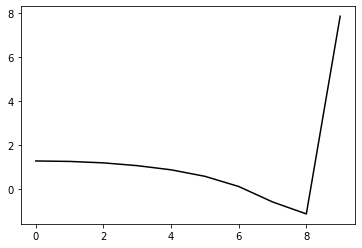

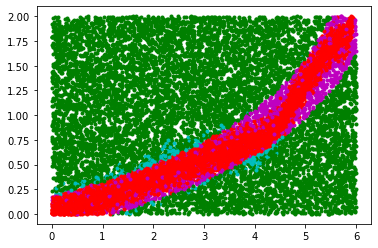

41000 0.17905549772983817
0.23585368209481483 -0.2246562684863672 0.20083451112778852 0.09676715473517304
[ 1.28439181  1.09715787  0.96857403  0.84182539  0.66365244  0.37978631
 -0.07726251 -0.78133328 -1.32900348  7.75893613]


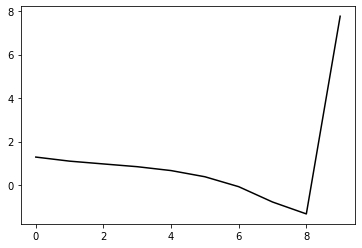

42000 0.16936278979700004
0.23626566560614348 -0.21879758970591537 0.19854637964405616 0.09921327786754942
[ 1.2941261   1.12663766  0.9896206   0.8587852   0.66934102  0.37438284
 -0.08555062 -0.79044679 -1.33857261  7.75593476]


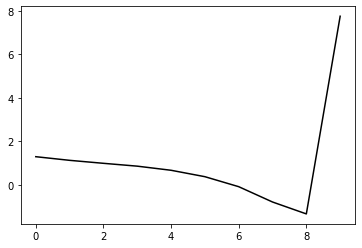

43000 0.1919421764853865
0.24262337529738318 -0.21753999254935855 0.2023857106463875 0.09633050217275524
[ 1.25749647  1.28420514  1.2190576   1.1106402   0.94041731  0.6560619
  0.19580301 -0.51587761 -1.07812449  7.89825271]


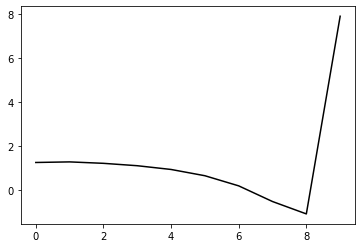

44000 0.19251988695948177
0.2417077279288182 -0.21676213012483103 0.20225674925843384 0.09572403018007462
[ 1.24390585  1.26352253  1.15959283  1.03695553  0.85637265  0.56630458
  0.0984267  -0.62422912 -1.19513932  7.83160019]


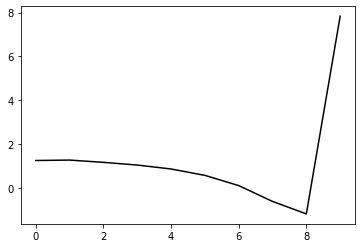

45000 0.2429964504883815
0.24303881012941336 -0.21607663654254622 0.20406881310571764 0.09731319441067915
[ 1.22906339  1.26966285  1.20364992  1.09092257  0.91734568  0.63769371
  0.1794202  -0.5412241  -1.11807678  7.80770273]


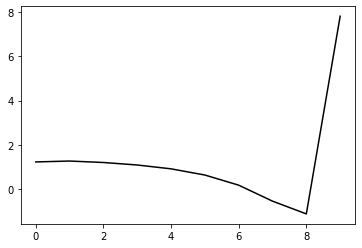

46000 0.237135666563155
0.2449528845348592 -0.2147692664241905 0.20444088386499115 0.09922260406995433
[ 1.21803075  1.30738054  1.24963062  1.13261493  0.95171194  0.66505524
  0.20809103 -0.50965293 -1.08824688  7.85985773]


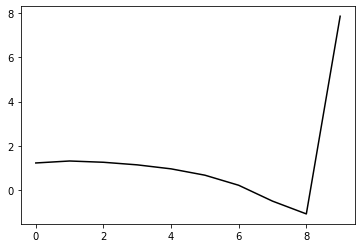

47000 0.4235255185954531
0.24103007626631176 -0.21471741632105398 0.20571228448186105 0.09734316461754026
[ 1.22303747  1.34139397  1.27610801  1.13208582  0.93483585  0.64588233
  0.18548282 -0.53831874 -1.13108192  7.85013599]


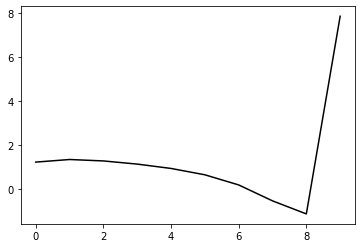

48000 0.11935178698684176
0.23920773503827852 -0.21381068987766624 0.20347792321615113 0.10398315080336348
[ 1.24162142  1.26884425  1.1839037   1.04972778  0.85548877  0.55673421
  0.08227764 -0.64852378 -1.23849336  7.84218963]


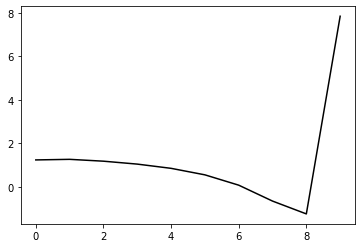

49000 0.17793237587356045
0.23854987722469248 -0.21263686077453622 0.2029808004795073 0.10149492510390523
[ 1.26879156  1.11459396  1.01594057  0.89732927  0.70798414  0.40094139
 -0.0845469  -0.82393626 -1.41704144  7.78256429]


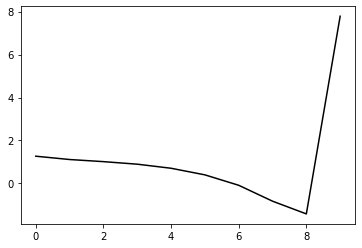

50000 0.3459885437191552
0.24265705417743832 -0.21253095486595902 0.20647834513142813 0.09792657474943536
[ 1.19732364  1.22506353  1.16405933  1.0554395   0.88291581  0.60095464
  0.13680408 -0.59190268 -1.17952518  7.83840637]


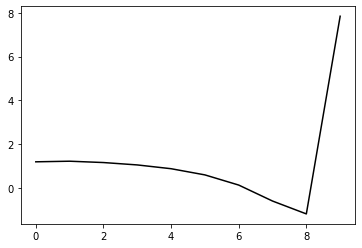

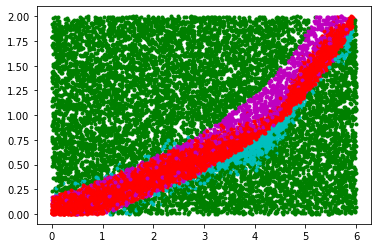

51000 0.2302549947023478
0.23961500766372992 -0.20236713468725645 0.20122499664910595 0.10001329605818779
[ 1.24618301  1.27445945  1.19983887  1.08277407  0.91314586  0.64192798
  0.19058586 -0.53779631 -1.1440041   7.87359586]


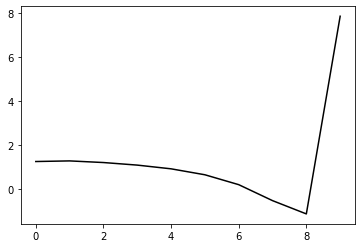

52000 0.21193323776920697
0.2329132874507506 -0.2178437586151452 0.2102443448207194 0.10153932483479776
[ 1.24405935  1.1771961   1.09072503  0.97843641  0.81307526  0.55039252
  0.12229959 -0.56475141 -1.12327294  7.86593688]


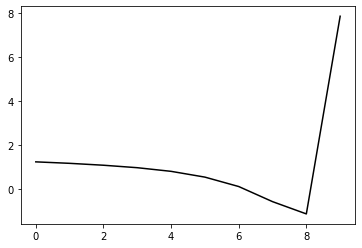

53000 0.26964912496683147
0.2380439299769222 -0.21065653301384565 0.2088124451133941 0.09682455451034491
[ 1.22229992  1.22645511  1.17026115  1.04484131  0.85463783  0.56709029
  0.11664869 -0.59095089 -1.17902392  7.83097807]


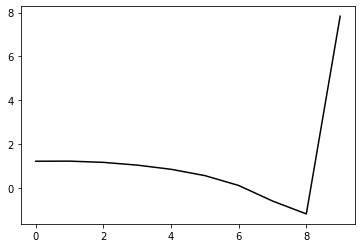

54000 0.22917317931554815
0.23450875932115245 -0.21288187481374152 0.20880268244786682 0.10060497808645631
[ 1.20689668  1.17503631  1.04564569  0.90425918  0.71356322  0.42126856
 -0.03544843 -0.73454977 -1.29754369  7.80535926]


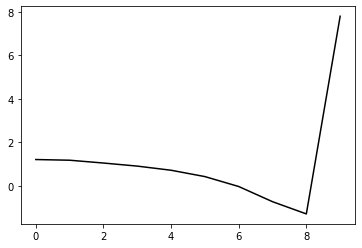

55000 0.20608089871848279
0.23551311603093014 -0.20610643808321014 0.20604078044012583 0.10273799818248038
[ 1.21396137  1.26511869  1.19175885  1.0745299   0.89601653  0.60254083
  0.13255227 -0.58420119 -1.16406124  7.8480629 ]


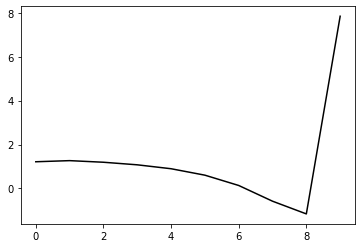

56000 0.19478609283250412
0.23525893074676638 -0.20622847494282814 0.2081694830427056 0.10159584585405519
[ 1.20196127  1.2342489   1.14791792  1.0216575   0.85640708  0.59159786
  0.14363884 -0.56654102 -1.14144275  7.8506957 ]


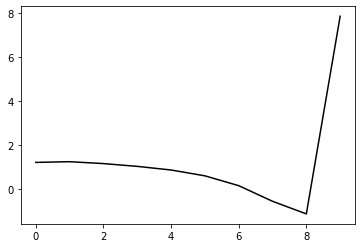

57000 0.20659839004506367
0.23016548868916992 -0.207578922212855 0.20801431113434649 0.10614233124532128
[ 1.18867615  1.18385031  1.09137627  0.96130913  0.77225808  0.49166094
  0.05038631 -0.64988854 -1.21734093  7.85805072]


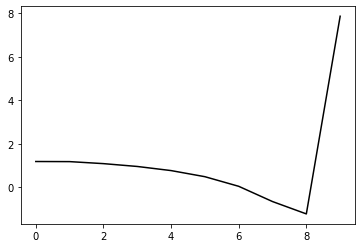

58000 0.28226791352318065
0.2292252490873164 -0.20416876377144016 0.208102651344163 0.10414629518620805
[ 1.19940611  1.1841932   1.10410222  0.98780113  0.81115706  0.53163049
  0.08537371 -0.61809905 -1.19938689  7.79374109]


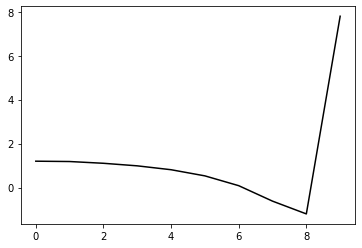

59000 0.283912218012563
0.2320795879534191 -0.20069777022751503 0.20762133482846104 0.10203464924266116
[ 1.19685788  1.18310486  1.09609042  0.97451687  0.79755699  0.51774202
  0.0698701  -0.6290885  -1.20077803  7.82797921]


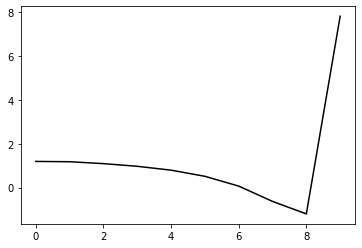

60000 0.1531522970882251
0.22789871500792577 -0.19852806747044793 0.20653113201457982 0.10466577226618987
[ 1.20737586  1.2171607   1.1467019   1.02680163  0.84302777  0.5555046
  0.10336359 -0.5988648  -1.17210082  7.84588043]


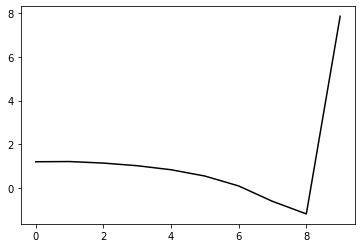

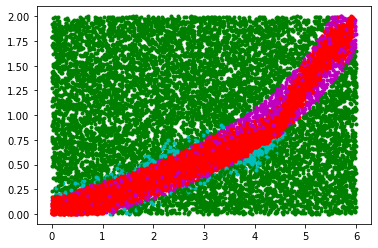

61000 0.16829611508577674
0.22434902566055712 -0.19926457847289736 0.20736646901592523 0.10101556390770351
[ 1.24708635  1.10131565  0.98204634  0.84381069  0.65475819  0.37515366
 -0.06944141 -0.76650256 -1.33047893  7.7946233 ]


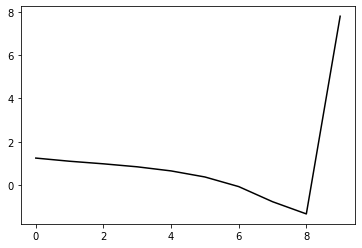

62000 0.18334989790434325
0.22920934342375257 -0.20353267518804094 0.21259404463449952 0.10239599547349472
[ 1.19437096  1.16701814  1.09626214  0.96979571  0.78877865  0.51128617
  0.07454725 -0.60482992 -1.1451891   7.82556972]


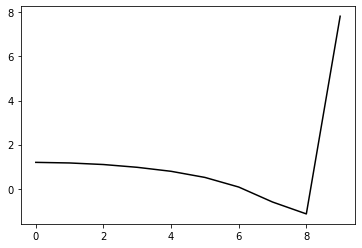

63000 0.22993605630898267
0.2253661832632394 -0.20059935114068153 0.21216177805423392 0.10142706950273485
[ 1.22327651  1.25024257  1.17627588  1.06989453  0.90458813  0.63223243
  0.19134567 -0.49775408 -1.05474311  7.84206277]


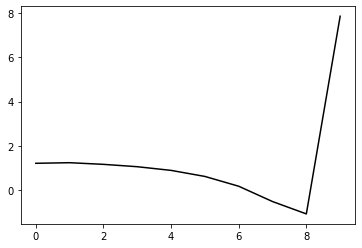

64000 0.1666080119600662
0.22225555384118892 -0.20400253142746466 0.21410558766427953 0.09994432791497644
[ 1.25813933  1.0828425   0.98152957  0.88525063  0.72352802  0.45305158
  0.01632927 -0.66329265 -1.19933267  7.84367557]


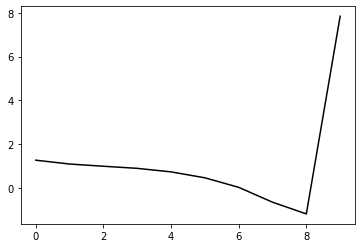

65000 0.18811763766786463
0.2262273704367884 -0.1885333331161077 0.20638837348062208 0.10046037738332667
[ 1.26940035  1.24121753  1.1697973   1.0601457   0.88323205  0.59509671
  0.13689786 -0.57235284 -1.14666569  7.84184852]


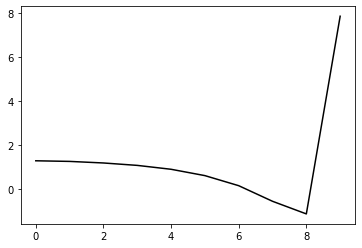

66000 0.18369149195345053
0.23305584050780628 -0.1912600188935016 0.21019636087613355 0.10087643686519904
[ 1.25234684  1.32514232  1.24791836  1.11501872  0.92494441  0.62609819
  0.15618576 -0.56313438 -1.14152853  7.83174303]


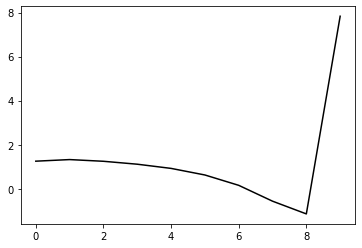

67000 0.2183806535027322
0.23115454397707286 -0.18670651596877405 0.20787052751947557 0.10070645979475795
[ 1.25929843  1.27583381  1.20171431  1.07728565  0.88917907  0.59577427
  0.13030326 -0.58974918 -1.17052274  7.88051645]


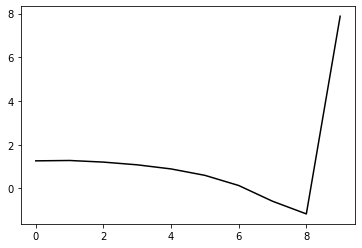

68000 0.3002419144953015
0.22848621131825617 -0.19560787333330318 0.21514375151863738 0.09610685071074508
[ 1.25270171e+00  1.20457601e+00  1.07231449e+00  9.29868611e-01
  7.43685353e-01  4.59330150e-01  7.25693781e-03 -6.97174431e-01
 -1.25819577e+00  7.80238623e+00]


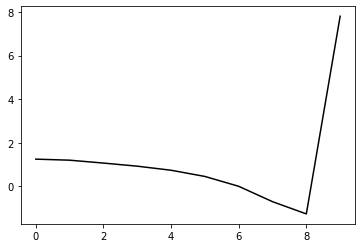

69000 0.14566645926048755
0.2282834058018475 -0.19063314340131132 0.21331327965884808 0.0987315923863995
[ 1.2648832   1.18729986  1.12686658  1.02702921  0.85333579  0.56617796
  0.10870158 -0.59795963 -1.16390096  7.86040574]


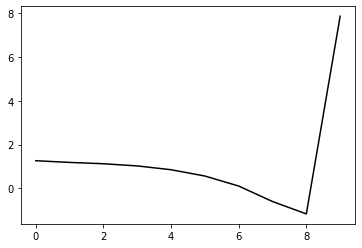

70000 0.21290724952311313
0.23593867840668822 -0.18716144145251334 0.21342047081910132 0.10090890783502596
[ 1.216045    1.32256531  1.25937041  1.1259398   0.92436514  0.62063556
  0.14905822 -0.57154236 -1.14479219  7.81983366]


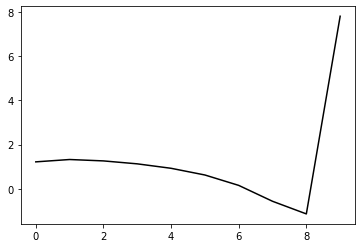

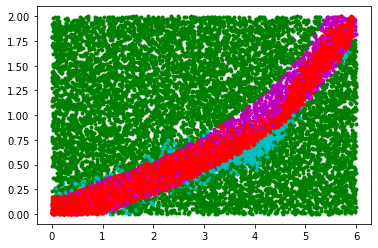

71000 0.2633050337061395
0.23498789706732623 -0.18828678148669017 0.21578325389615607 0.09825068048177574
[ 1.24308897  1.32922797  1.25999385  1.11622974  0.91304994  0.6101789
  0.13420123 -0.59867395 -1.19146322  7.76898286]


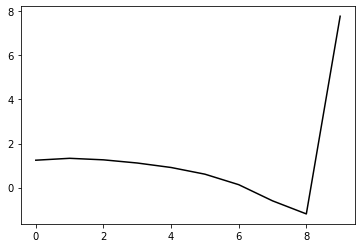

72000 0.2234898132375931
0.23416109075202526 -0.18548230942016145 0.21367140022923833 0.09873113009405633
[ 1.30595857  1.19839039  1.12208772  1.01336202  0.82501572  0.51305196
  0.01927911 -0.73080813 -1.33686061  7.78423822]


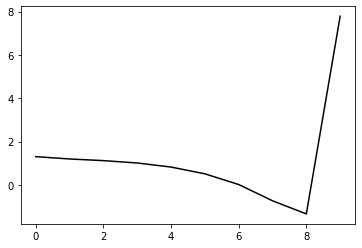

73000 0.21403434324725226
0.23637959614820492 -0.1889901745418747 0.21684994159873727 0.09937016836751168
[ 1.25366484e+00  1.21632754e+00  1.11017804e+00  9.84537585e-01
  7.94570411e-01  4.88986116e-01  5.20076368e-04 -7.48470397e-01
 -1.34696573e+00  7.80538146e+00]


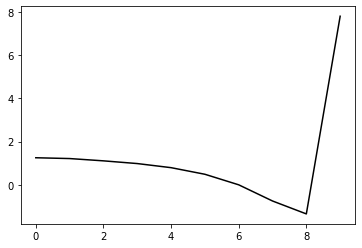

74000 0.24415835297968674
0.23714012398410747 -0.1873092945324163 0.21703622307120227 0.09784020000177672
[ 1.24571396e+00  1.20027791e+00  1.09197192e+00  9.77144193e-01
  7.93919404e-01  4.90467754e-01  1.74675846e-03 -7.53866373e-01
 -1.36334776e+00  7.80903304e+00]


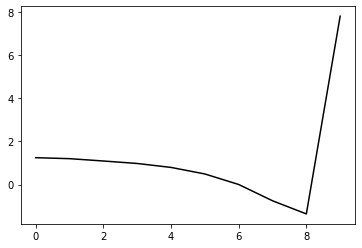

75000 0.2934152194540612
0.23732094625747374 -0.1858600785475001 0.2167410026964925 0.10099612827211334
[ 1.22568922  1.21298418  1.130144    1.01294672  0.82882547  0.53221749
  0.05205675 -0.69750318 -1.30226517  7.81328314]


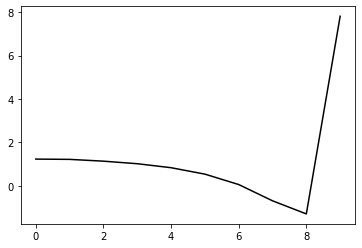

76000 0.2015109244739492
0.23847178734243524 -0.18258759196761043 0.21444218712282798 0.10319836964581325
[ 1.23082024  1.20362573  1.11293142  0.98013154  0.78491658  0.47314552
 -0.02358624 -0.78764129 -1.40705431  7.80813218]


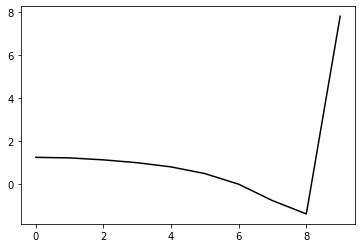

77000 0.31045149395897165
0.23413101367440714 -0.1851465215600594 0.21601896034975426 0.10296328370613816
[ 1.20654644  1.17847365  1.06367334  0.92413223  0.72452172  0.41343401
 -0.07936069 -0.84360828 -1.46683312  7.77618683]


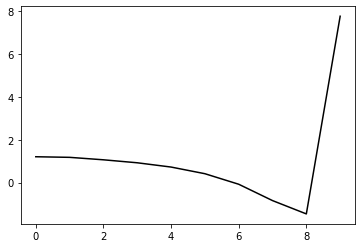

78000 0.23809558610482234
0.23421468234979725 -0.18623672073315464 0.216958836492177 0.10212139760707929
[ 1.20946797  1.16427838  1.03992172  0.90341729  0.70796174  0.39812163
 -0.09925956 -0.86954236 -1.50162769  7.76431092]


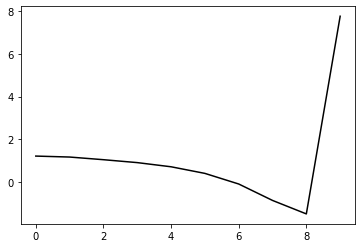

79000 0.17837254222570018
0.23098221690419063 -0.1818942156417989 0.21358094758676566 0.10877554708176167
[ 1.21504835  1.20893754  1.14563615  1.03044924  0.83902891  0.52868127
  0.03107133 -0.7440137  -1.38725653  7.80861969]


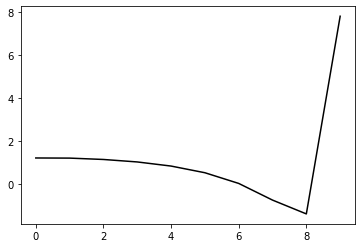

80000 0.1931033395197093
0.231874145606642 -0.18268599398571778 0.2150229682663165 0.10832387684257447
[ 1.21406894  1.23488014  1.17727897  1.05198034  0.85637804  0.54763628
  0.04991885 -0.73133893 -1.38905405  7.79699877]


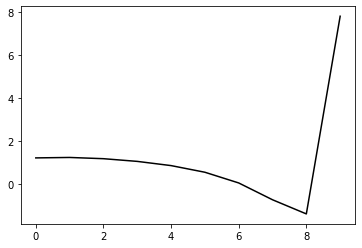

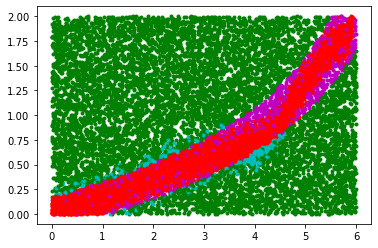

81000 0.3124344135780521
0.228872483969625 -0.18530089229249885 0.21739778772847074 0.1022505474641517
[ 1.21697371  1.12779067  0.9939996   0.83703887  0.62199016  0.31127984
 -0.17997737 -0.95776135 -1.61828006  7.75140008]


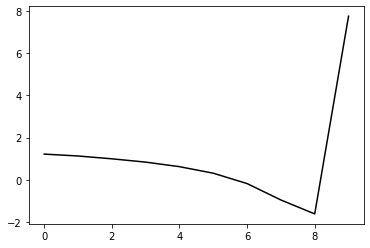

82000 0.24721263834090523
0.2290113339618987 -0.18147190442095376 0.21557451512334466 0.11103761218913567
[ 1.20440725e+00  1.21365267e+00  1.15460173e+00  1.02553972e+00
  8.18477370e-01  4.96491217e-01 -6.14574405e-03 -7.84753836e-01
 -1.44753931e+00  7.79890464e+00]


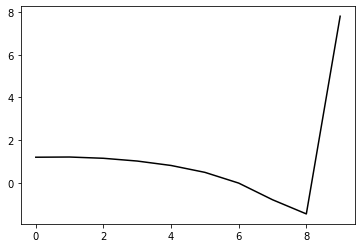

83000 0.18338428875340124
0.22838577574952199 -0.18149932923383733 0.21614207083990017 0.1116495689847663
[ 1.20410431  1.19873491  1.12392859  1.00724394  0.81443774  0.49777556
 -0.01227182 -0.80251285 -1.47748926  7.75936917]


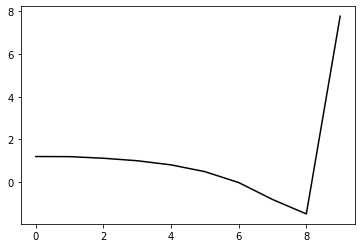

84000 0.17664084154323048
0.21961809491809353 -0.18970300442359414 0.22063052350580784 0.11217497857170938
[ 1.221146    1.15517768  1.0784415   0.97689058  0.81042884  0.5237148
  0.03708422 -0.74369014 -1.41730586  7.76141655]


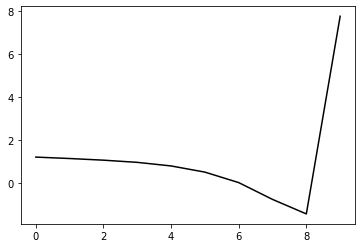

85000 0.1940352585538299
0.22652405989935237 -0.1765573297686009 0.21590471738484088 0.10572562386584938
[ 1.2008167   1.25518513  1.19313549  1.0786524   0.9023258   0.61319209
  0.12594922 -0.66941737 -1.37848797  7.74965654]


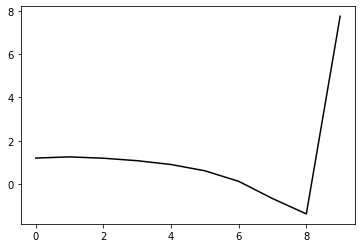

86000 0.17108864978002813
0.23105941082143927 -0.17858878356681535 0.2181693315561191 0.10568312873023238
[ 1.22270331  1.18281438  1.1182247   1.0029554   0.81270993  0.50990765
  0.02413617 -0.75908473 -1.45758468  7.79819628]


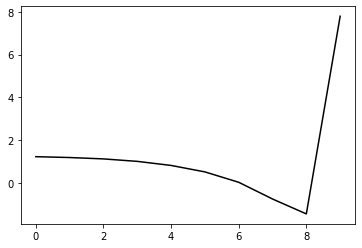

87000 0.1955329401761664
0.2288836268764054 -0.18080193494051236 0.2198580426890563 0.10689262847859964
[ 1.22419053  1.19660697  1.1103051   0.98163243  0.79264967  0.50142818
  0.029523   -0.73562229 -1.42181804  7.7792896 ]


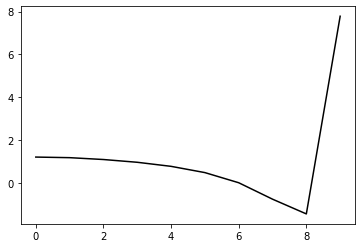

88000 0.17712296196179567
0.2332405691355801 -0.176097718996176 0.2187890776916681 0.10551259886342926
[ 1.20054007  1.25130067  1.17760945  1.04284683  0.84422968  0.54364805
  0.06458745 -0.70413743 -1.40082618  7.80220392]


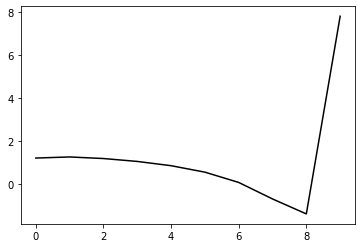

89000 0.24114744727004264
0.22935882145447292 -0.1812151145738709 0.22204386031417736 0.10206532185101548
[ 1.22134877  1.1962889   1.08045044  0.93990107  0.74012949  0.43663918
 -0.04098362 -0.79798124 -1.47822353  7.79204632]


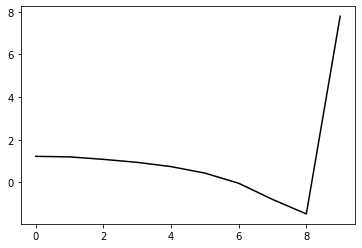

90000 0.25442472801385335
0.23406616173021985 -0.1840938254367149 0.22441301919039203 0.10849431644384434
[ 1.2029345   1.16240397  1.09643268  0.99535773  0.81421802  0.51781408
  0.04939872 -0.68210872 -1.31943014  7.80422761]


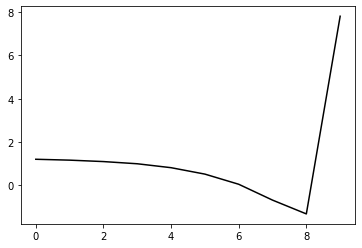

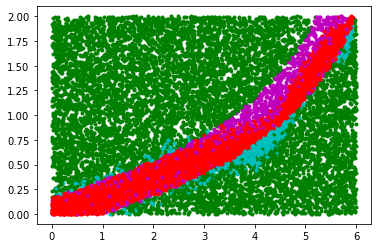

91000 0.2035003180970798
0.23465995291685973 -0.17630848259825735 0.22033444074664482 0.10758230596978009
[ 1.24262241  1.16351702  1.10185614  0.97689739  0.774373    0.46889369
 -0.00940573 -0.75305924 -1.39569374  7.8302375 ]


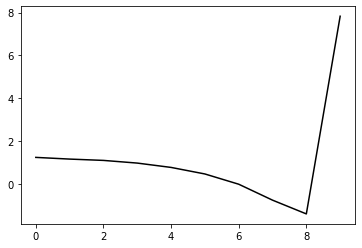

92000 0.29286437974702734
0.23349401186893065 -0.17656696603269204 0.2209501367650195 0.10270547325515568
[ 1.20282527  1.13311833  1.00928712  0.85295594  0.64030164  0.31651678
 -0.182063   -0.94028101 -1.58746593  7.71959039]


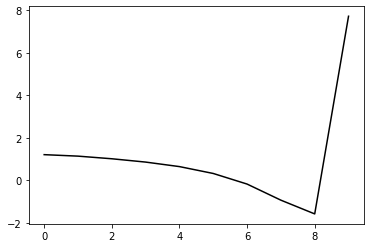

93000 0.19017546119985865
0.23210284374239437 -0.17736006105538848 0.22218501151994008 0.10520409665292182
[ 1.20440196  1.16129743  1.05086598  0.92511523  0.7295409   0.41202487
 -0.08842163 -0.85040773 -1.49320037  7.78272176]


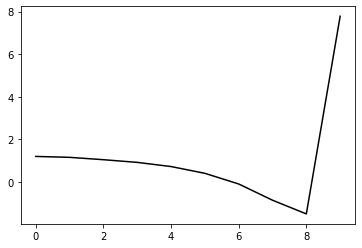

94000 0.19407957401554507
0.2293342659268232 -0.17619075596825784 0.22152271266459564 0.10847312282515455
[ 1.23363887  1.24701982  1.15320223  1.0198043   0.82912663  0.52882022
  0.04061693 -0.7198959  -1.35770718  7.79018455]


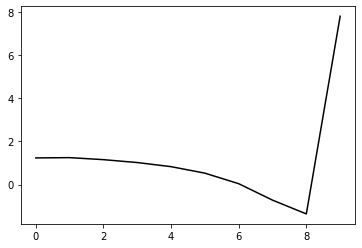

95000 0.19880538668424128
0.23023214808876963 -0.17438281077830659 0.22060955286090692 0.10907191482159198
[ 1.20377323  1.20295081  1.11888371  0.9965957   0.8177009   0.52565673
  0.04208983 -0.72061784 -1.36461112  7.7692055 ]


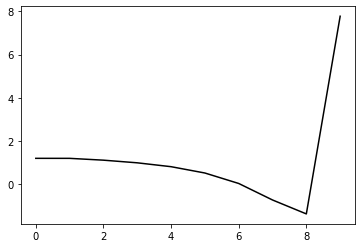

96000 0.19333974867940396
0.22806301068408988 -0.17335904204306307 0.21973227429314404 0.11008753431866787
[ 1.19284488  1.20686945  1.1254224   1.00485707  0.82324405  0.53382523
  0.06462    -0.68255228 -1.31340153  7.80766645]


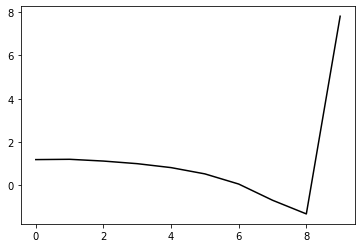

97000 0.21708789868593242
0.22490859235856314 -0.1737321225252717 0.21976336092684473 0.10657553131524788
[ 1.24433292  1.09303016  0.97542739  0.84552622  0.65617627  0.36302349
 -0.10294995 -0.84143185 -1.46729214  7.77220848]


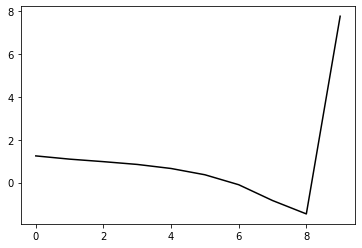

98000 0.1530192275622497
0.2295042864722517 -0.17385989917601877 0.22056303622503212 0.10805600632997357
[ 1.19761612  1.21304297  1.1106091   0.9622997   0.75635158  0.45177742
 -0.01836089 -0.74986406 -1.36710931  7.8099352 ]


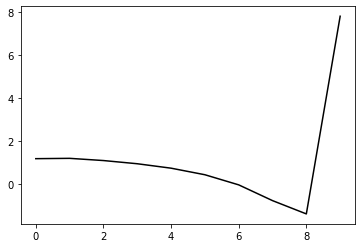

99000 0.12359880718394582
0.22937443156858178 -0.17219946960332264 0.21915854601577475 0.10688252948208303
[ 1.22218422  1.15801897  1.0876663   0.95676533  0.7437641   0.42047879
 -0.07016256 -0.81633448 -1.44346606  7.81544536]


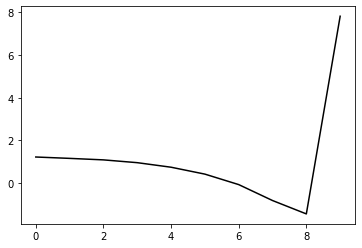

In [18]:
optimizer=tf.optimizers.Adam(learning_rate=0.0005)
for j in range (10000):    
    with tf.GradientTape() as g:
        loss=Error_func(h, m2, lam, alpha, beta, Positive[j%set], Negative[j%set])
        gradients=g.gradient(loss, [h, m2, lam, alpha, beta])
        if np.isnan(loss)==True: break
    for i in range (90):
        optimizer.apply_gradients(zip(gradients, [h]))
        if any(np.isnan(h.numpy()))==True: break
    for i in range (10):
        optimizer.apply_gradients(zip(gradients, [h, m2, lam, alpha, beta]))
        if any(np.isnan(h.numpy()))==True: break
    if j%100==0: 
        print(j*10, Error_func(h, m2, lam, alpha, beta, Positive[np.int32((j/set)%set)], Negative[np.int32((j/set)%set)]).numpy())
        print(m2.numpy(), lam.numpy(), alpha.numpy(), beta.numpy()), print(h.numpy())
        plt.plot(h.numpy(), 'k-'), plt.show()
    if j%1000==0:
        for i in range (set):
            [Positive0[i], Positive1[i]]=NN_func_01(h, m2, lam, alpha, beta, Positive[i])
            [Negative0[i], Negative1[i]]=NN_func_01(h, m2, lam, alpha, beta, Negative[i])
        for i in range (set):
            x_data1[i]=[v[0] for v in Positive0[i]]
            y_data1[i]=[v[1] for v in Positive0[i]]
            x_data2[i]=[v[0] for v in Positive1[i]]
            y_data2[i]=[v[1] for v in Positive1[i]]
            x_data3[i]=[v[0] for v in Negative0[i]]
            y_data3[i]=[v[1] for v in Negative0[i]]
            x_data4[i]=[v[0] for v in Negative1[i]]
            y_data4[i]=[v[1] for v in Negative1[i]]
            plt.plot(x_data4[i], y_data4[i], 'g.')
            plt.plot(x_data2[i], y_data2[i], 'c.')
            plt.plot(x_data1[i], y_data1[i], 'r.')
            plt.plot(x_data3[i], y_data3[i], 'm.')
        plt.show()

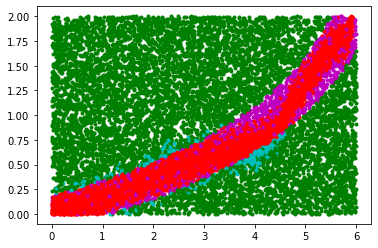

In [19]:
for i in range (set):
    [Positive0[i], Positive1[i]]=NN_func_01(h, m2, lam, alpha, beta, Positive[i])
    [Negative0[i], Negative1[i]]=NN_func_01(h, m2, lam, alpha, beta, Negative[i])
for i in range (set):
    x_data1[i]=[v[0] for v in Positive0[i]]
    y_data1[i]=[v[1] for v in Positive0[i]]
    x_data2[i]=[v[0] for v in Positive1[i]]
    y_data2[i]=[v[1] for v in Positive1[i]]
    x_data3[i]=[v[0] for v in Negative0[i]]
    y_data3[i]=[v[1] for v in Negative0[i]]
    x_data4[i]=[v[0] for v in Negative1[i]]
    y_data4[i]=[v[1] for v in Negative1[i]]
    plt.plot(x_data4[i], y_data4[i], 'g.')
    plt.plot(x_data2[i], y_data2[i], 'c.')
    plt.plot(x_data1[i], y_data1[i], 'r.')
    plt.plot(x_data3[i], y_data3[i], 'm.')
plt.show()